### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_main=pd.read_csv('CWC23_all_innings.csv')
df= df_main.copy()
df.sample(10)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
14,NED,BFW de Leede (NED),bowl,60,74,3.0,0.050000,1.233333,v England,Pune,8-Nov-23,10.0,0.0,7.4,1,NaN,NaN,NaN,NaN,NaN
1016,AFG,Rashid Khan (AFG),bat,13,8,NaN,0.076923,0.615300,v New Zealand,Chennai,18-Oct-23,NaN,NaN,NaN,2,0.0,1.0,61.53,0.0,10.0
1362,SA,G Coetzee (SA),bat,39,19,NaN,0.025641,0.487100,v Australia,Eden Gardens,16-Nov-23,NaN,NaN,NaN,1,2.0,0.0,48.71,0.0,42.0
15,BAN,Shoriful Islam (BAN),bowl,60,75,3.0,0.050000,1.250000,v England,Dharamsala,10-Oct-23,10.0,0.0,7.5,1,NaN,NaN,NaN,NaN,NaN
833,SL,BKG Mendis (SL),bat,30,19,NaN,0.033333,0.633300,v Bangladesh,Delhi,6-Nov-23,NaN,NaN,NaN,1,1.0,1.0,63.33,0.0,49.0
930,NED,CN Ackermann (NED),bat,25,12,NaN,0.040000,0.480000,v South Africa,Dharamsala,17-Oct-23,NaN,NaN,NaN,1,1.0,0.0,48.00,0.0,40.0
889,ENG,JM Bairstow (ENG),bat,17,15,NaN,0.058824,0.882300,v Netherlands,Pune,8-Nov-23,NaN,NaN,NaN,1,2.0,0.0,88.23,0.0,29.0
1245,ENG,CR Woakes (ENG),bowl,33,27,1.0,0.030303,0.818182,v Pakistan,Eden Gardens,11-Nov-23,5.3,0.0,4.9,2,NaN,NaN,NaN,NaN,NaN
868,NED,SA Edwards (NED),bat,16,16,NaN,0.062500,1.000000,v Sri Lanka,Lucknow,21-Oct-23,NaN,NaN,NaN,1,0.0,0.0,100.00,0.0,22.0
984,NED,BFW de Leede (NED),bat,12,10,NaN,0.083333,0.833300,v England,Pune,8-Nov-23,NaN,NaN,NaN,2,2.0,0.0,83.33,0.0,11.0


#### Summary of the dataset

In [3]:
# Overview of the data
def dataoverview(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("Number of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nNumber of Missing values:", df.isnull().sum().values.sum())
    print("\nNumber of Unique values:")
    print(df.nunique())
    print("\nData types of the features:")
    print(df.dtypes)

dataoverview(df, 'A brief summary of the dataset') 

A brief summary of the dataset:

Number of rows:  1408
Number of features: 20

Data Features:
['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts', 'wicketball_prob', 'runs_per_ball', 'opposition', 'ground', 'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr', 'not_out', 'mins']

Number of Missing values: 6194

Number of Unique values:
team                10
player             152
bat_or_bowl          2
bb_bf              117
runs               128
wkts                 7
wicketball_prob    129
runs_per_ball      645
opposition          10
ground              10
start_date          41
overs               38
mdns                 4
econ               230
inns                 2
4s                  20
6s                  12
sr                 429
not_out              2
mins               156
dtype: int64

Data types of the features:
team                object
player              object
bat_or_bowl         object
bb_bf                int64
runs                 int64
wkts    

In [4]:
#Missing Values
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [5]:
#replacing 'v' from the opposition columns
df['opposition'] = df['opposition'].str.replace(r'v', '')

In [6]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [7]:
# Handling missing values for bowlers
bowler_columns = ['4s', '6s', 'sr', 'not_out', 'mins']
df_bowlers = df[df['bat_or_bowl'] == 'bowl']
df_bowlers[bowler_columns] = df_bowlers[bowler_columns].fillna(0)

# Handling missing values for batsmen
batsman_columns = ['wkts', 'overs', 'mdns', 'econ']
df_batsmen = df[df['bat_or_bowl'] == 'bat']
df_batsmen[batsman_columns] = df_batsmen[batsman_columns].fillna(0)
df=pd.concat([df_batsmen,df_bowlers])
df.head()

C:\Users\Siddhant Ghosh\AppData\Local\Temp\ipykernel_15000\3628653568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bowlers[bowler_columns] = df_bowlers[bowler_columns].fillna(0)
C:\Users\Siddhant Ghosh\AppData\Local\Temp\ipykernel_15000\3628653568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batsmen[batsman_columns] = df_batsmen[batsman_columns].fillna(0)


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,0.0,0.000000,1.5703,Afghanistan,Wankhede,7-Nov-23,0.0,0.0,0.0,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,0.0,0.007143,1.2428,Bangladesh,Wankhede,24-Oct-23,0.0,0.0,0.0,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,0.0,0.008065,1.3145,Pakistan,Bengaluru,20-Oct-23,0.0,0.0,0.0,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,0.0,0.000000,1.2561,England,Ahmedabad,5-Oct-23,0.0,0.0,0.0,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,0.0,0.009346,1.3084,Bangladesh,Dharamsala,10-Oct-23,0.0,0.0,0.0,1,16.0,5.0,130.84,0.0,106.0


In [8]:
#changing the data types and column name
df['4s'] = df['4s'].astype(int)
df['6s'] = df['6s'].astype(int)
df['Strike Rate']= df.sr
df=df.drop(['sr'], axis=1)

In [9]:
#adding new columns
df['Boundary Runs'] = df['4s'] * 4 + df['6s'] * 6
df['Percentage Runs from Boundaries'] = (df['Boundary Runs'] / df['runs']) * 100
df['match_date']=pd.to_datetime(df['start_date'],format='%d-%b-%y')
df['Boundaries_hit']= df['4s']+df['6s']
df.head()
df = df.sort_values(by='match_date')
df['match_no'] = df.reset_index().index + 1
df['dummy']=df.groupby(['match_date','opposition']).ngroup() +1
def match_imputer(i):
    if i%2 ==0:
        return i //2
    else:
        return (i // 2) + 1
    
df['match_no'] = df.dummy.apply(match_imputer)
df.match_no.unique()

array([ 1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 27, 29, 30, 31, 32, 33, 34,
       36, 35, 37, 38, 39, 40, 41, 42, 44, 43, 45, 46, 47], dtype=int64)

### Exploratory Data Analysis

1. Team Performance Analysis:
 - Explore team-wise performance metrics.
 - Analyze runs scored, wickets taken, and batting/bowling styles.
 - Identify top-performing teams and their strengths.

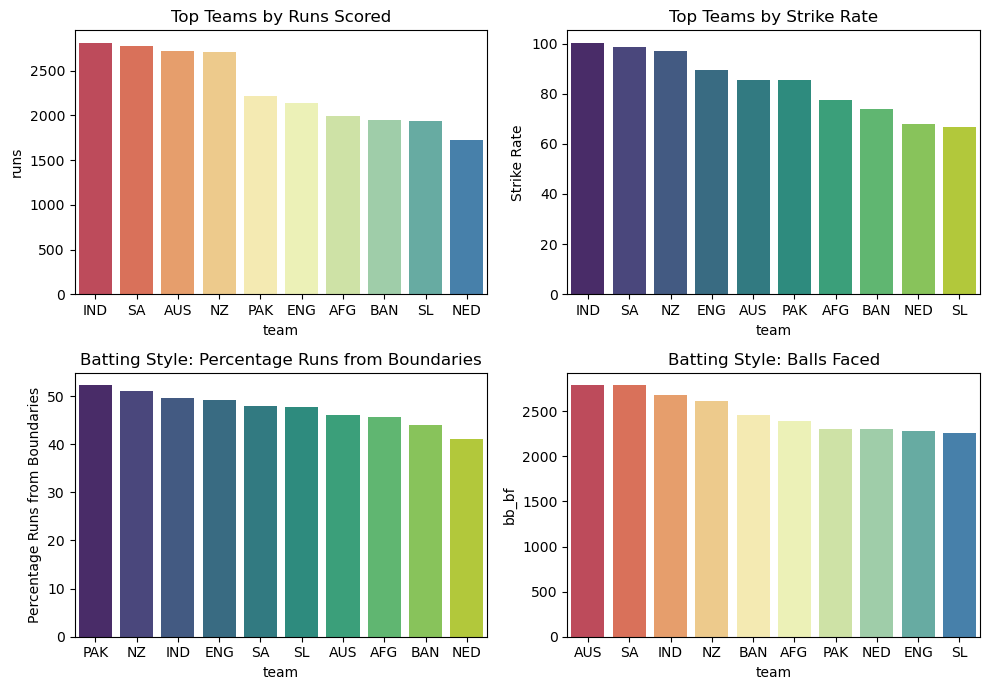

In [10]:
# team wise performance -> batting
team_performance=df[df['bat_or_bowl'] == 'bat'].groupby('team').agg({
    'runs': 'sum',
    'runs_per_ball': 'mean',
    'bb_bf' : 'sum',
    'Strike Rate': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'Percentage Runs from Boundaries': 'mean'
}).reset_index()
plt.figure(figsize=(10, 7))

# Total runs score by each team
plt.subplot(2, 2, 1)
sns.barplot(y='runs', x='team', data=team_performance.sort_values(by='runs', ascending=False), palette='Spectral')
plt.title('Top Teams by Runs Scored')

# Total wickets by each team
plt.subplot(2, 2, 2)
sns.barplot(y='Strike Rate', x='team', data=team_performance.sort_values(by='Strike Rate', ascending=False), palette='viridis')
plt.title("Top Teams by Strike Rate")

# Average Run per Ball
plt.subplot(2, 2, 3)
sns.barplot(y='Percentage Runs from Boundaries', x='team', data=team_performance.sort_values(by='Percentage Runs from Boundaries', ascending=False), palette='viridis')
plt.title('Batting Style: Percentage Runs from Boundaries')

# Average Wicket probability
plt.subplot(2, 2, 4)
sns.barplot(y='bb_bf', x='team', data=team_performance.sort_values(by='bb_bf', ascending=False), palette='Spectral')
plt.title('Batting Style: Balls Faced')

plt.tight_layout()
plt.show()


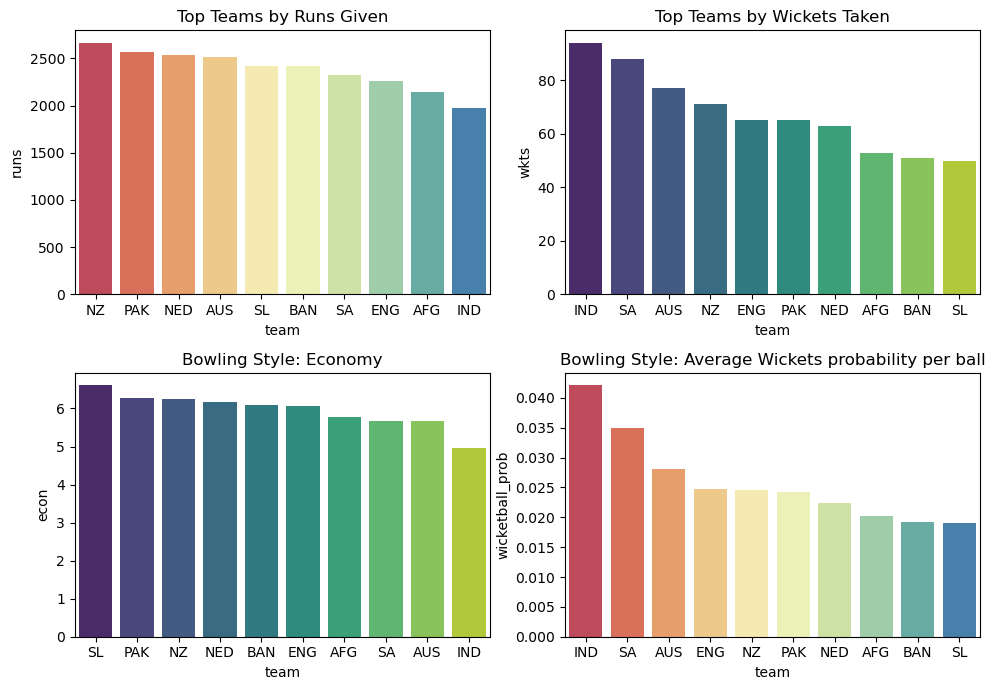

In [11]:
# team wise performance -> bowling
team_performance=df[df['bat_or_bowl'] =='bowl'].groupby('team').agg({
    'runs': 'sum',
    'runs_per_ball': 'mean',
    'wkts' : 'sum',
    'Strike Rate': 'mean',
    'wicketball_prob': 'mean',
    'econ': 'mean',
    'mdns': 'sum'
}).reset_index()

plt.figure(figsize=(10, 7))

# Total runs score by each team
plt.subplot(2, 2, 1)
sns.barplot(y='runs', x='team', data=team_performance.sort_values(by='runs', ascending=False), palette='Spectral')
plt.title('Top Teams by Runs Given')

# Total wickets by each team
plt.subplot(2, 2, 2)
sns.barplot(y='wkts', x='team', data=team_performance.sort_values(by='wkts', ascending=False), palette='viridis')
plt.title("Top Teams by Wickets Taken")

# Average Run per Ball
plt.subplot(2, 2, 3)
sns.barplot(y='econ', x='team', data=team_performance.sort_values(by='econ', ascending=False), palette='viridis')
plt.title('Bowling Style: Economy')

# Average Wicket probability
plt.subplot(2, 2, 4)
sns.barplot(y='wicketball_prob', x='team', data=team_performance.sort_values(by='wicketball_prob', ascending=False), palette='Spectral')
plt.title('Bowling Style: Average Wickets probability per ball')

plt.tight_layout()
plt.show()


2. Player Performance Analysis:
 - Evaluate individual player statistics for both batting and bowling.
 - Identify leading run-scorers and wicket-takers.
 - Assess the impact of players on their team's performance.

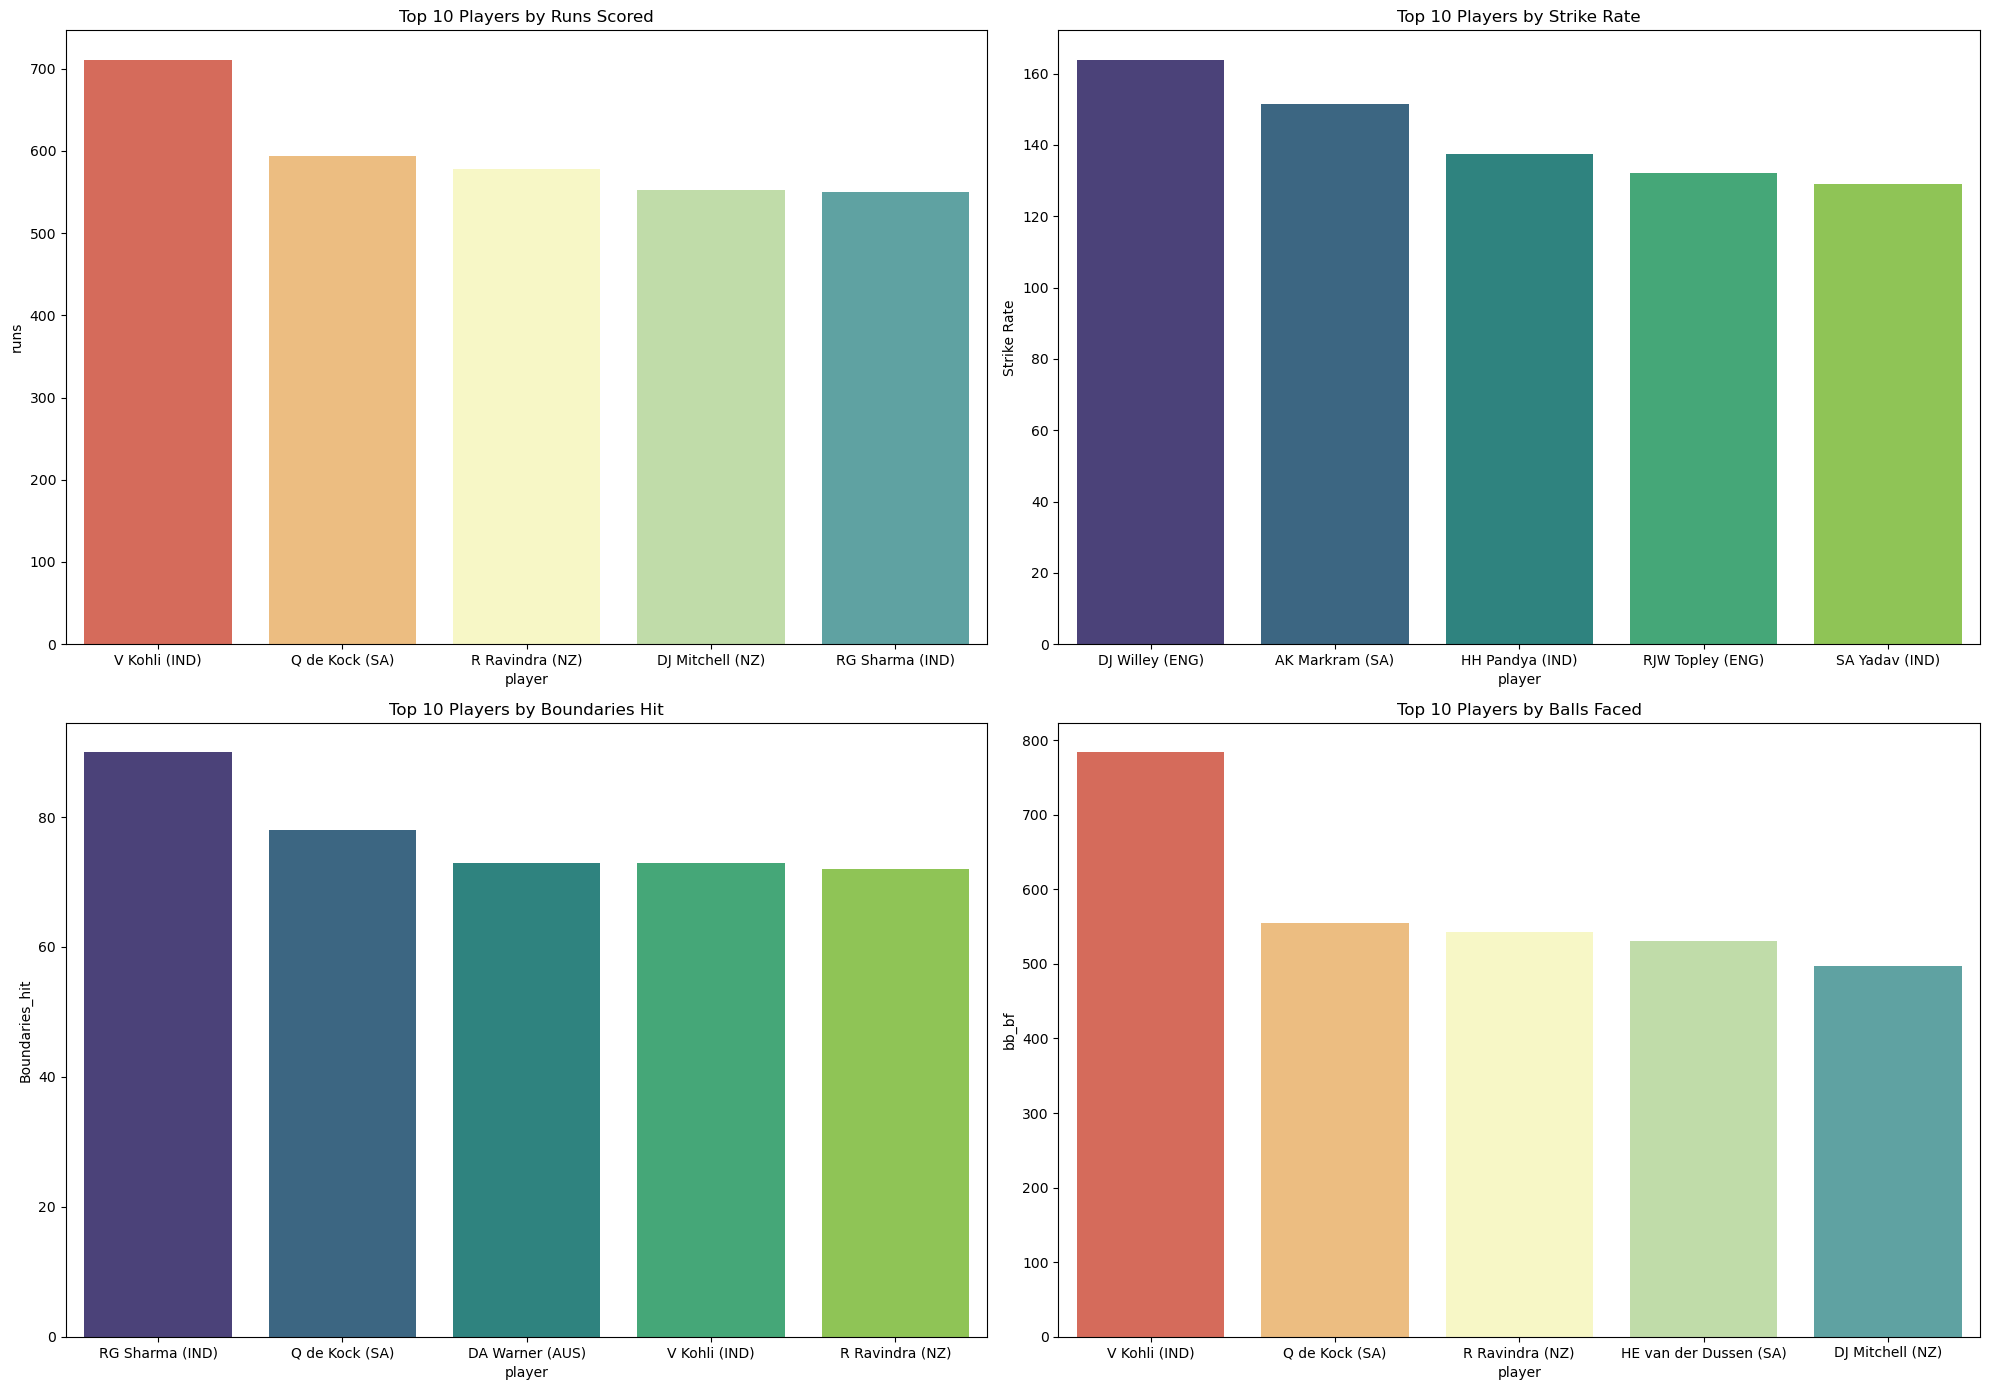

In [12]:
#Individual performances -> Batting
player_performance_batting=df[df['bat_or_bowl'] =='bat'].groupby(['player']).agg({
    'runs': 'sum',
    'runs_per_ball': 'mean',
    'bb_bf' : 'sum',
    'Strike Rate': 'mean',
    'Percentage Runs from Boundaries': 'mean',
    'Boundaries_hit':'sum'
}).reset_index()

plt.figure(figsize=(20, 14))

# Top 10 players by runs given
plt.subplot(2,2, 1)
sns.barplot(y='runs', x='player', data=player_performance_batting.nlargest(5, 'runs'), palette='Spectral')
plt.title('Top 10 Players by Runs Scored')

# Top 10 players by wickets taken
plt.subplot(2,2,2)
sns.barplot(y='Strike Rate', x='player', data=player_performance_batting.nlargest(5, 'Strike Rate'), palette='viridis')
plt.title('Top 10 Players by Strike Rate')

# Top 10 players by boundaries hit
plt.subplot(2,2, 3)
sns.barplot(y='Boundaries_hit', x='player', data=player_performance_batting.nlargest(5, 'Boundaries_hit'), palette='viridis')
plt.title('Top 10 Players by Boundaries Hit')

# Top 10 players by average wickets probability per ball
plt.subplot(2,2,4)
sns.barplot(y='bb_bf', x='player', data=player_performance_batting.nlargest(5, 'bb_bf'), palette='Spectral')
plt.title('Top 10 Players by Balls Faced')

plt.tight_layout()
plt.show()


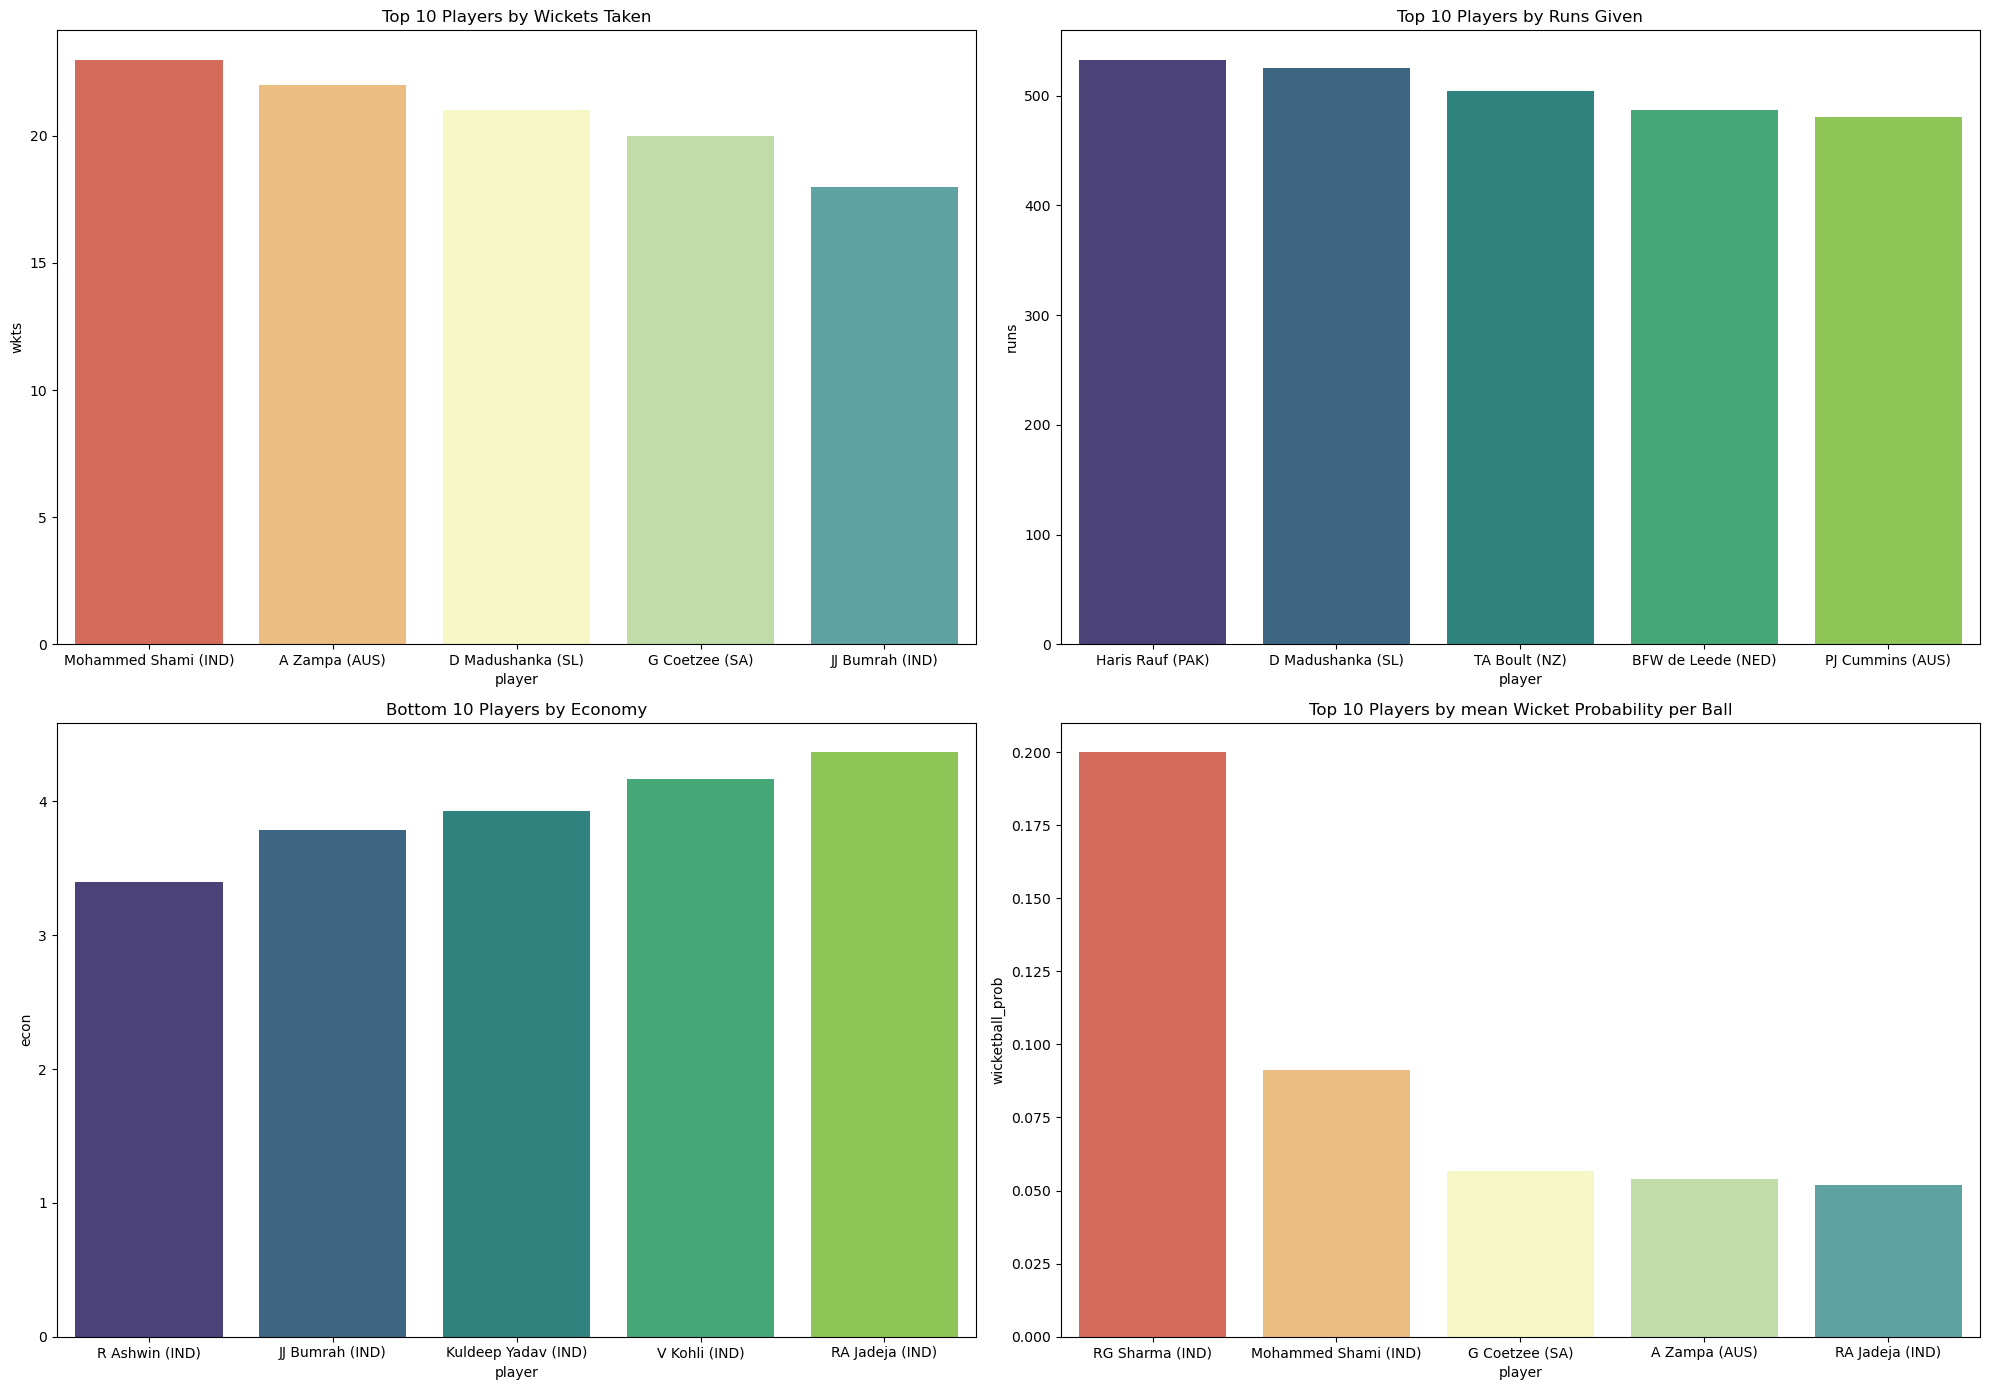

In [13]:
#Individual perfomances -> Bowling
player_perforance_bowling=df[df['bat_or_bowl'] =='bowl'].groupby(['player']).agg({
   'runs': 'sum',
    'runs_per_ball': 'mean',
    'wkts' : 'sum',
    'Strike Rate': 'mean',
    'wicketball_prob': 'mean',
    'econ': 'mean',
    'mdns': 'sum'
}).reset_index()

plt.figure(figsize=(20, 14))

# Top 10 players by runs given
plt.subplot(2,2, 1)
sns.barplot(y='wkts', x='player', data=player_perforance_bowling.nlargest(5, 'wkts'), palette='Spectral')
plt.title('Top 10 Players by Wickets Taken')

# Top 10 players by wickets taken
plt.subplot(2,2,2)
sns.barplot(y='runs', x='player', data=player_perforance_bowling.nlargest(5, 'runs'), palette='viridis')
plt.title('Top 10 Players by Runs Given')

# Top 10 players by boundaries hit
plt.subplot(2,2, 3)
sns.barplot(y='econ', x='player', data=player_perforance_bowling.nsmallest(5, 'econ'), palette='viridis')
plt.title('Bottom 10 Players by Economy')

# Top 10 players by average wickets probability per ball
plt.subplot(2,2,4)
sns.barplot(y='wicketball_prob', x='player', data=player_perforance_bowling.nlargest(5, 'wicketball_prob'), palette='Spectral')
plt.title('Top 10 Players by mean Wicket Probability per Ball')

plt.tight_layout()
plt.show()


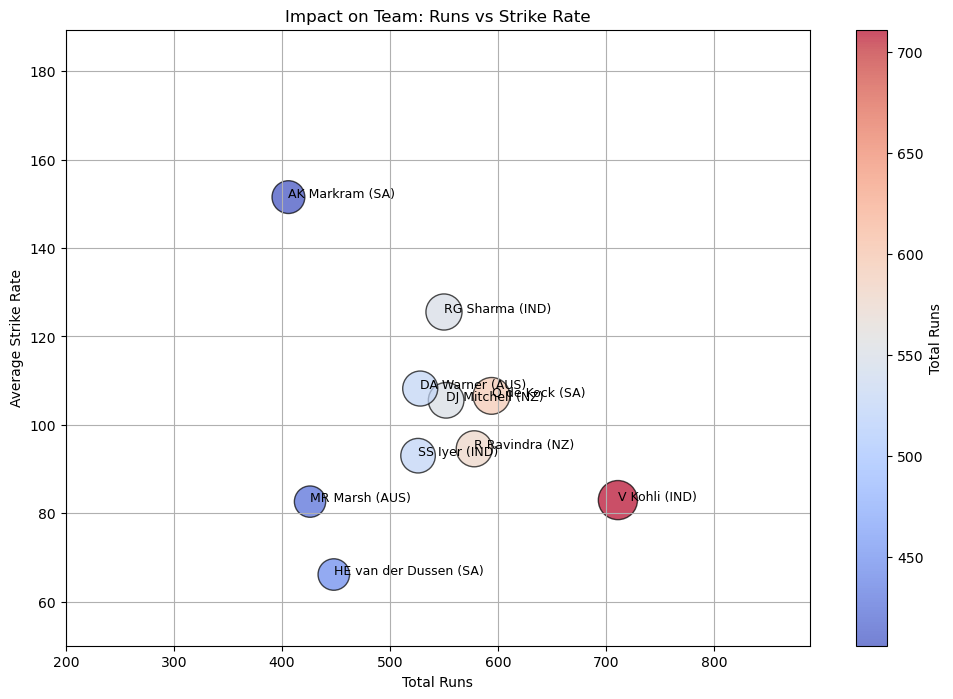

In [14]:
# Impact of players on team performance
team_impact_bat = df[df['bat_or_bowl'] == 'bat'].groupby(['player']).agg({
    'runs': 'sum',
    'Strike Rate': 'mean'
}).reset_index()

# Top 10 players (as there are a lot of players so plotting all doesn't seem good)
top_10 = team_impact_bat.nlargest(10, 'runs')

# Bubble chart for impact (Runs Vs Strike Rate)
plt.figure(figsize=(12, 8))

plt.scatter(x='runs', y='Strike Rate', s=top_10['runs'] + top_10['Strike Rate'], data=top_10, alpha=0.7, cmap='coolwarm', c=top_10['runs'], edgecolors='black')

plt.title('Impact on Team: Runs vs Strike Rate')
plt.xlabel('Total Runs')
plt.ylabel('Average Strike Rate')

# Adjusting axes limits
plt.xlim(200, top_10['runs'].max() * 1.25)
plt.ylim(50, top_10['Strike Rate'].max() * 1.25)

# Adding player labels
for i, txt in enumerate(top_10['player']):
    plt.annotate(txt, (top_10['runs'].iloc[i], top_10['Strike Rate'].iloc[i]), fontsize=9)

plt.colorbar(label='Total Runs')
plt.grid(True)
plt.show()


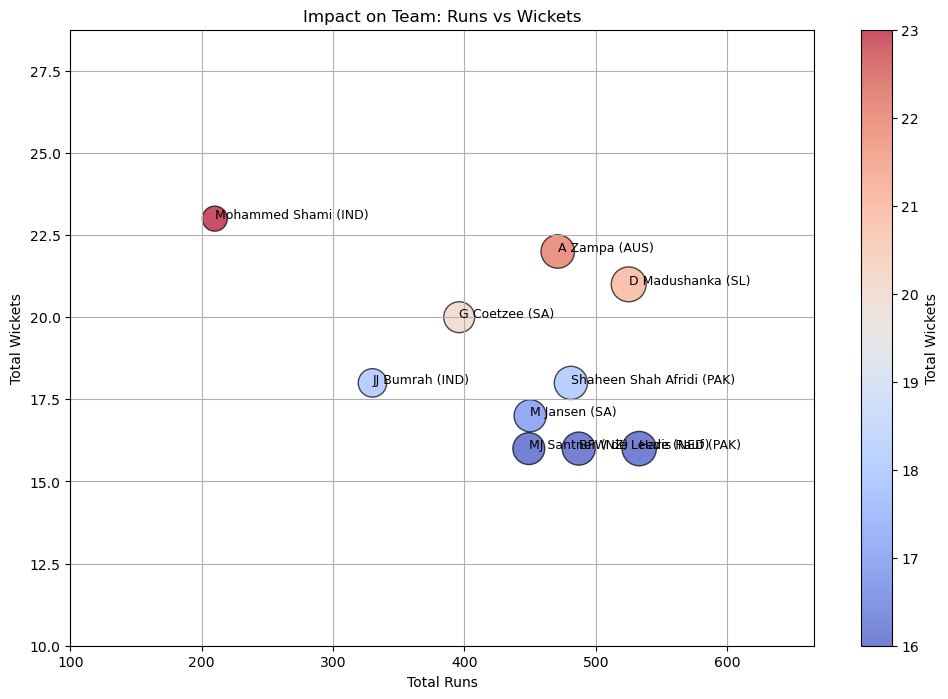

In [15]:
# Impact of players on team performance
team_impact_bowl = df[df['bat_or_bowl'] == 'bowl'].groupby(['player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Top 20 players (as there are a lot of players so plotting all doesn't seem good)
top_20 = team_impact_bowl.nlargest(10,['wkts'])

# Bubble chart for impact (Runs Vs Wickets)
plt.figure(figsize=(12, 8))

plt.scatter(x='runs', y='wkts', s=top_20['runs'] + top_20['wkts'] * 5, data=top_20, alpha=0.7, cmap='coolwarm', c=top_20['wkts'], edgecolors='black')

plt.title('Impact on Team: Runs vs Wickets')
plt.xlabel('Total Runs')
plt.ylabel('Total Wickets')

# Adjusting axes limits
plt.xlim(100, top_20['runs'].max() * 1.25)
plt.ylim(10, top_20['wkts'].max() * 1.25)

# Adding player labels
for i, txt in enumerate(top_20['player']):
    plt.annotate(txt, (top_20['runs'].iloc[i], top_20['wkts'].iloc[i]), fontsize=9)

plt.colorbar(label='Total Wickets')
plt.grid(True)
plt.show()


3. Opposition and Ground Analysis:
 - Investigate how teams and players perform against different oppositions.
 - Examine performance variations across different playing grounds.
 - Identify if there are specific teams or players that excel in certain conditions.

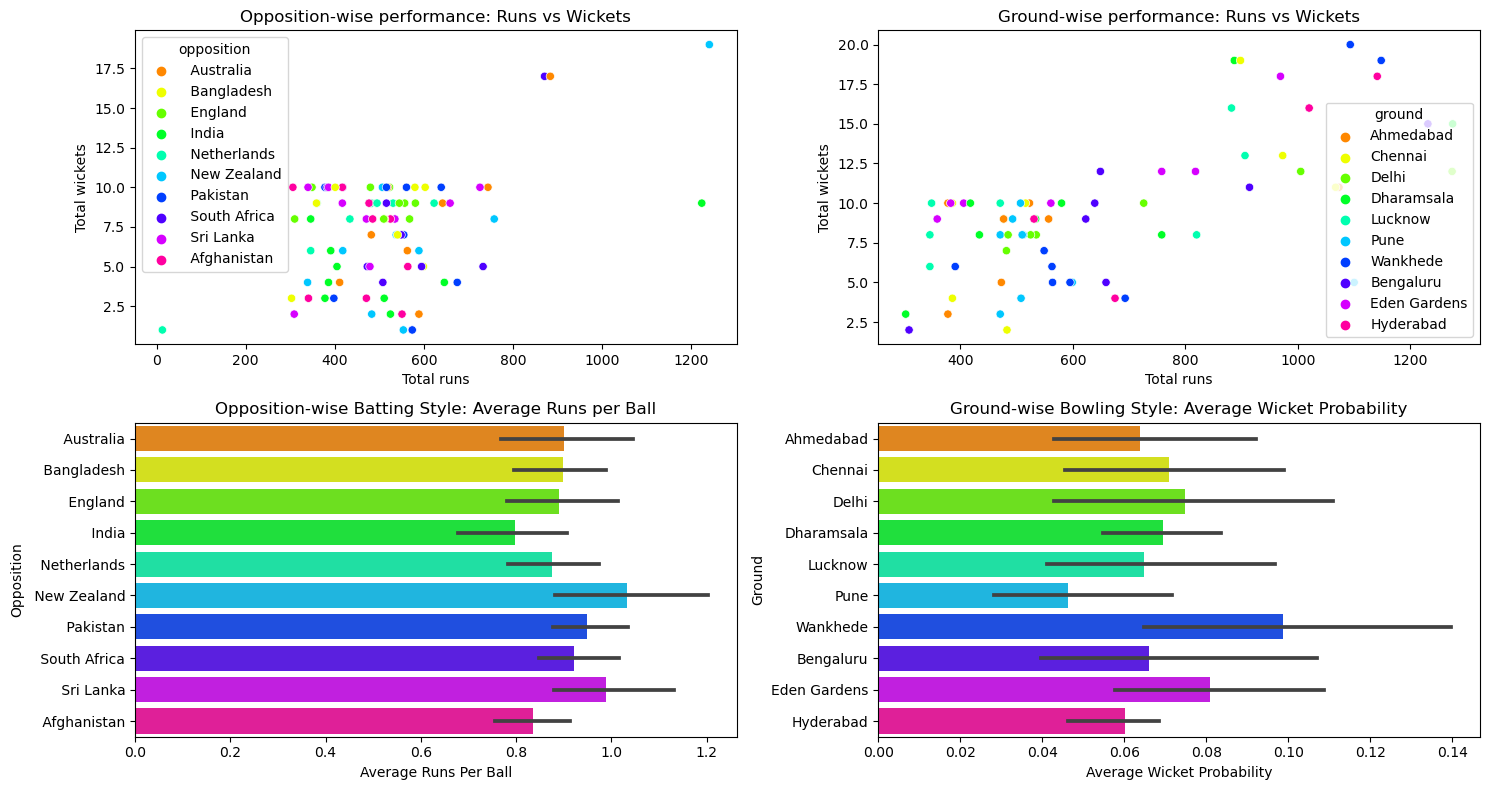

In [16]:
#opposition wise performanace

opposition_performance=df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()
#ground wise performance

ground_performance=df.groupby(['team', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()


plt.figure(figsize=(15, 8))

# Opposition-wise performance: Runs vs Wickets
plt.subplot(2, 2, 1)
sns.scatterplot(x='runs', y='wkts', data=opposition_performance, hue='opposition', palette='hsv')
plt.title('Opposition-wise performance: Runs vs Wickets')
plt.xlabel('Total runs')
plt.ylabel('Total wickets')

# Ground-wise performance: Runs vs Wickets
plt.subplot(2, 2, 2)
sns.scatterplot(x='runs', y='wkts', data=ground_performance, hue='ground', palette='hsv')
plt.title('Ground-wise performance: Runs vs Wickets')
plt.xlabel('Total runs')
plt.ylabel('Total wickets')

# Opposition-wise Batting Style
plt.subplot(2, 2, 3)
sns.barplot(x='runs_per_ball', y='opposition', data=opposition_performance, palette='hsv')
plt.title('Opposition-wise Batting Style: Average Runs per Ball')
plt.xlabel('Average Runs Per Ball')
plt.ylabel('Opposition')

# Ground-wise Bowling Style
plt.subplot(2, 2, 4)
sns.barplot(x='wicketball_prob', y='ground', data=ground_performance, palette='hsv')
plt.title('Ground-wise Bowling Style: Average Wicket Probability')
plt.xlabel('Average Wicket Probability')
plt.ylabel('Ground')

plt.tight_layout()
plt.show()


4. Temporal Analysis:
 - Study performance trends over time, considering start dates and overs played.
 - Identify any temporal patterns or changes in team and player performance.


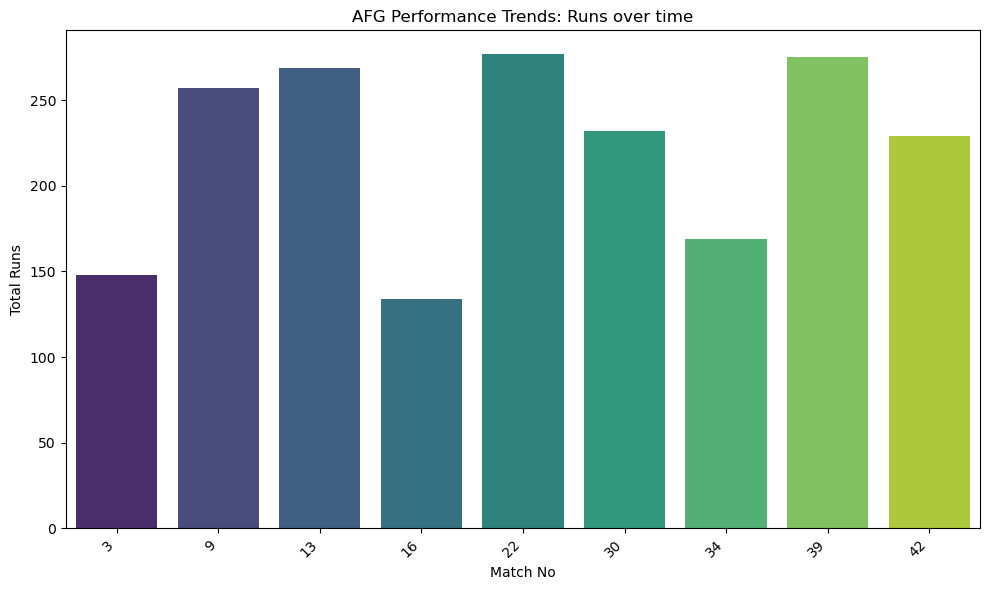

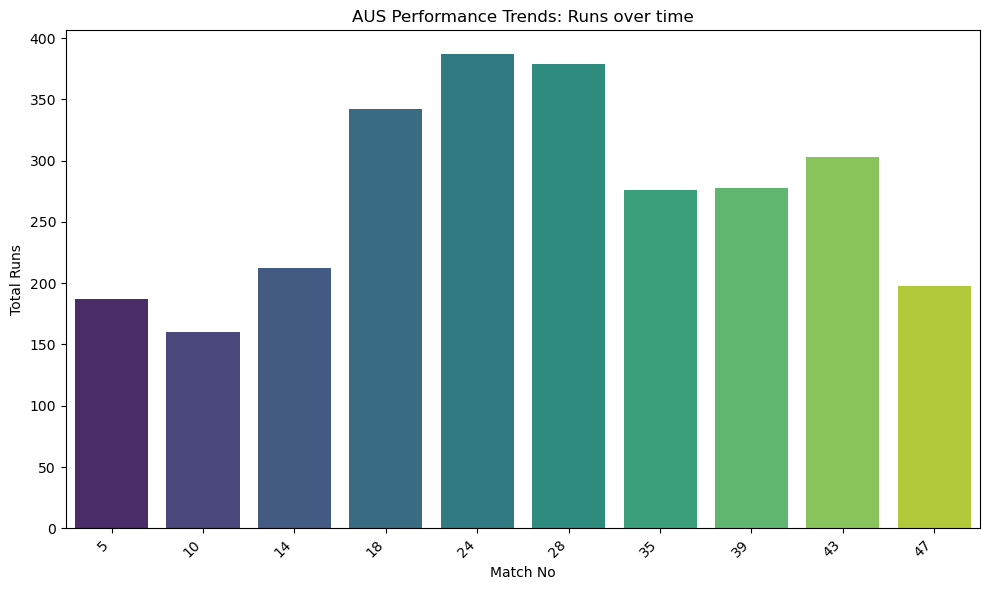

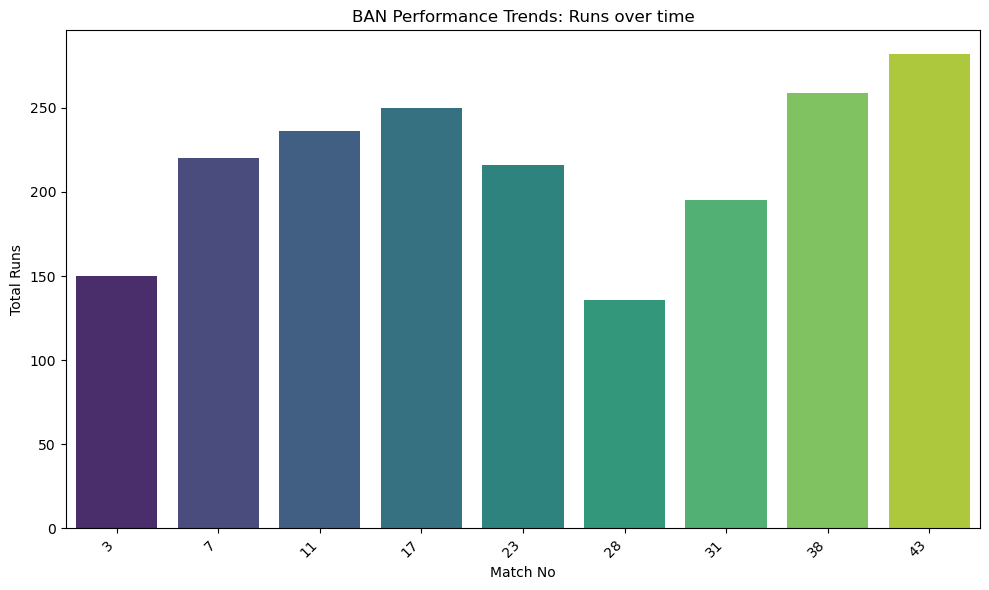

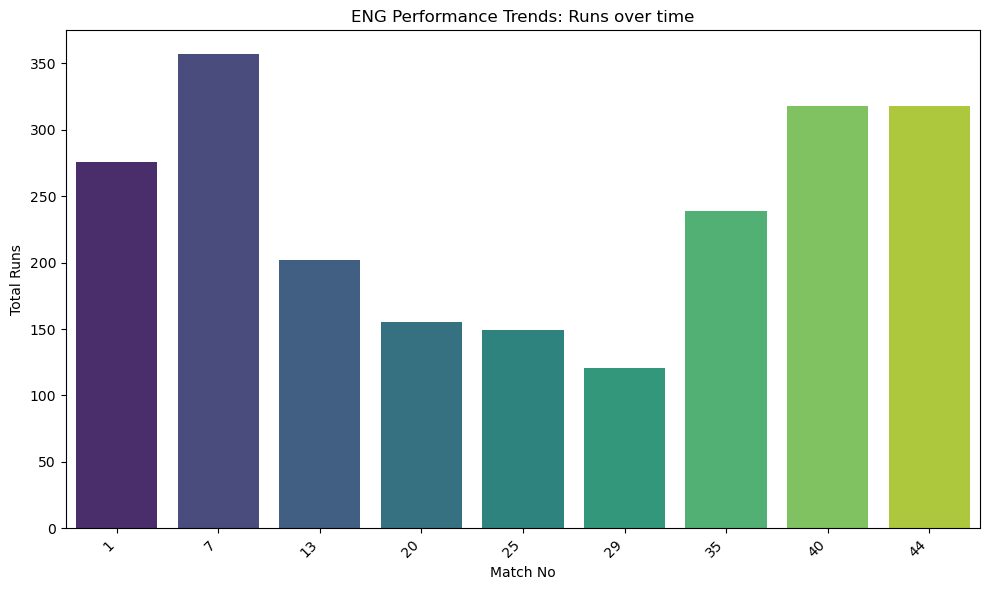

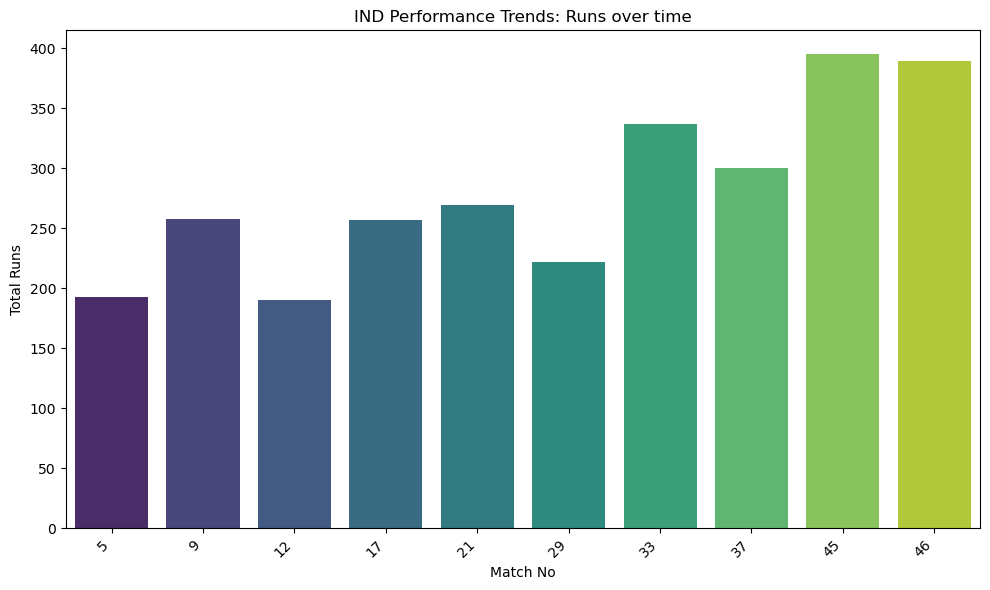

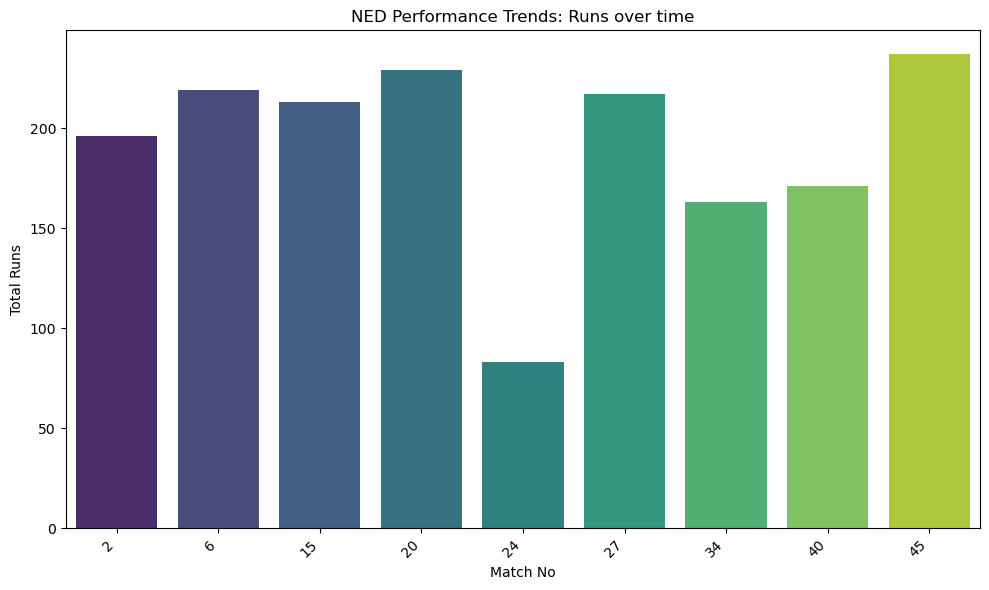

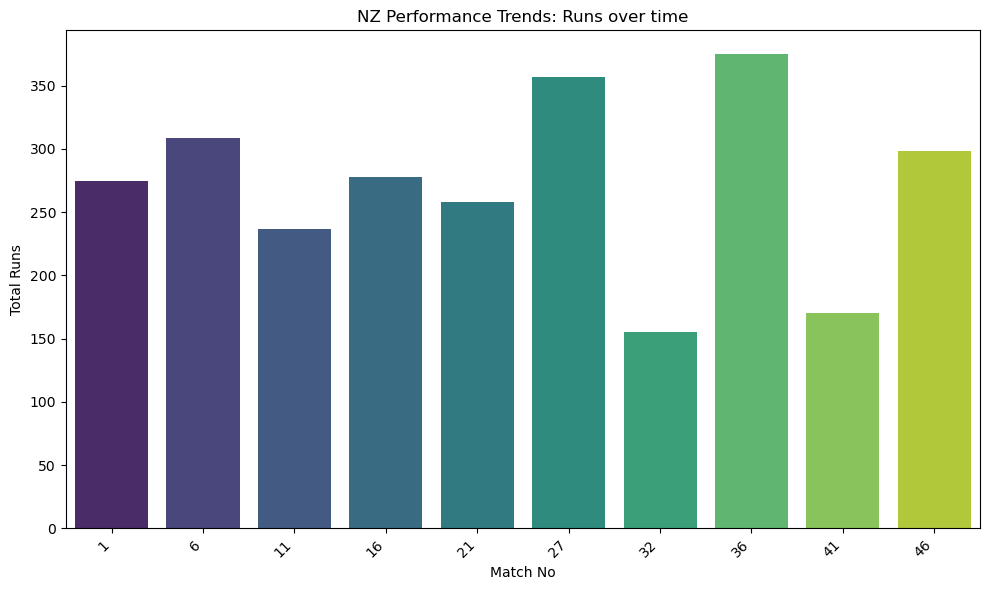

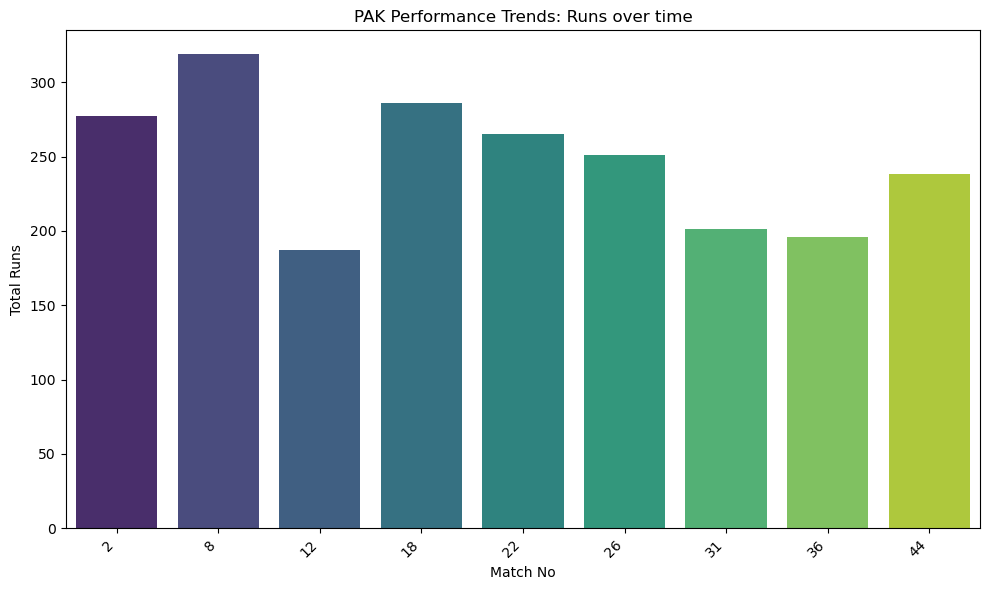

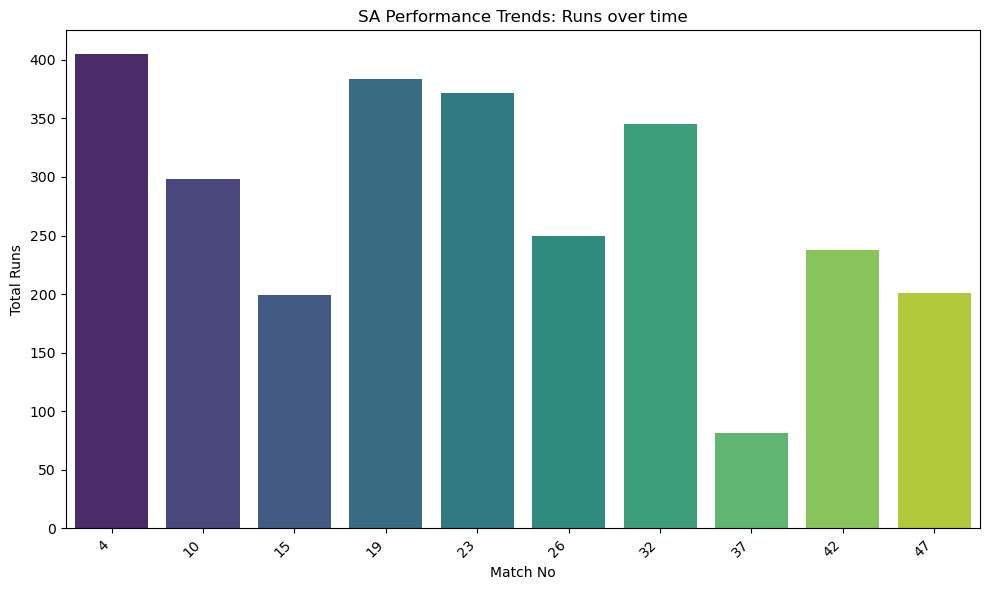

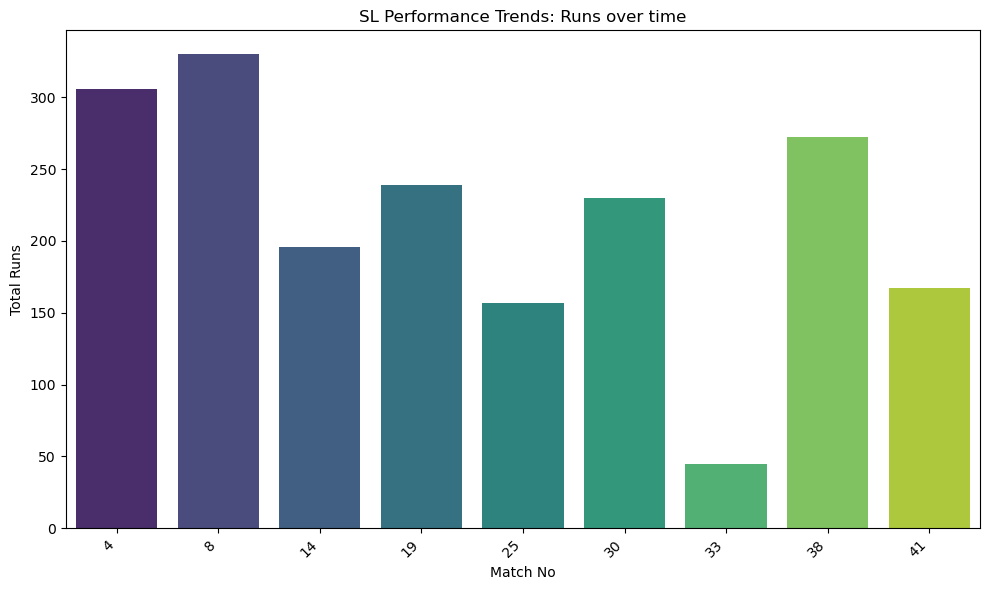

In [17]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bat'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='runs', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Runs over time')
    plt.xlabel('Match No')
    plt.ylabel('Total Runs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


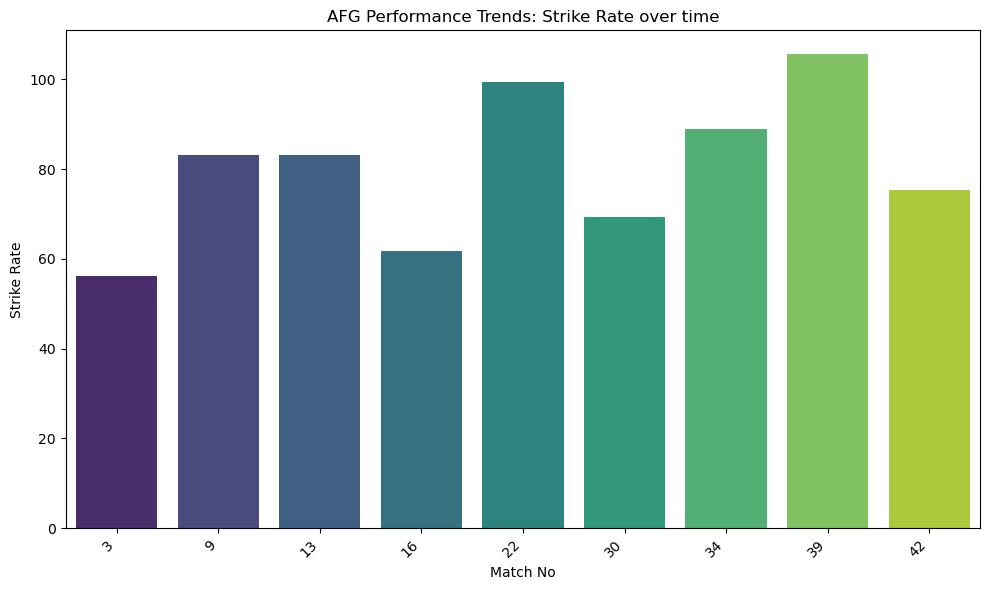

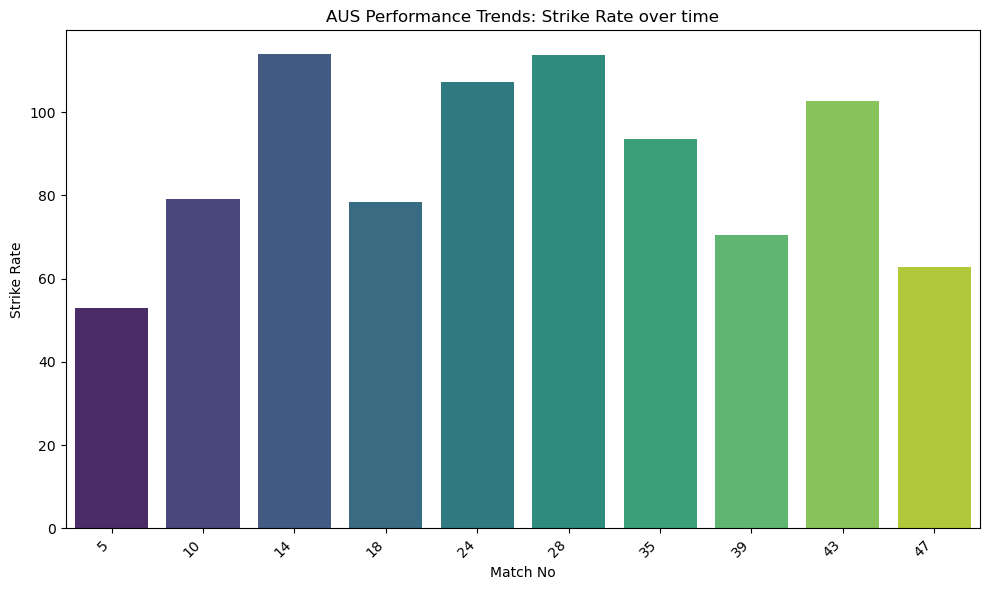

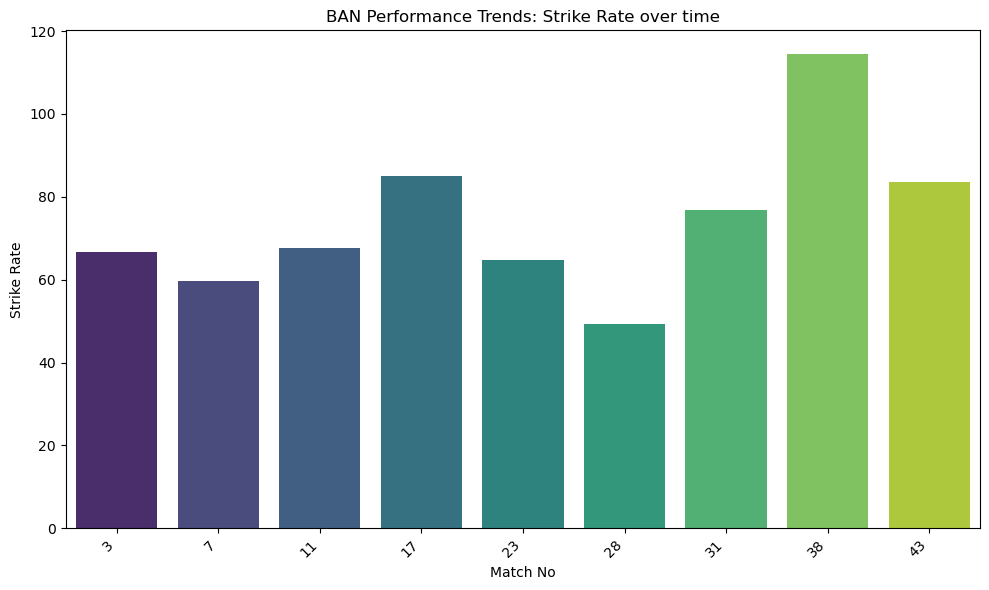

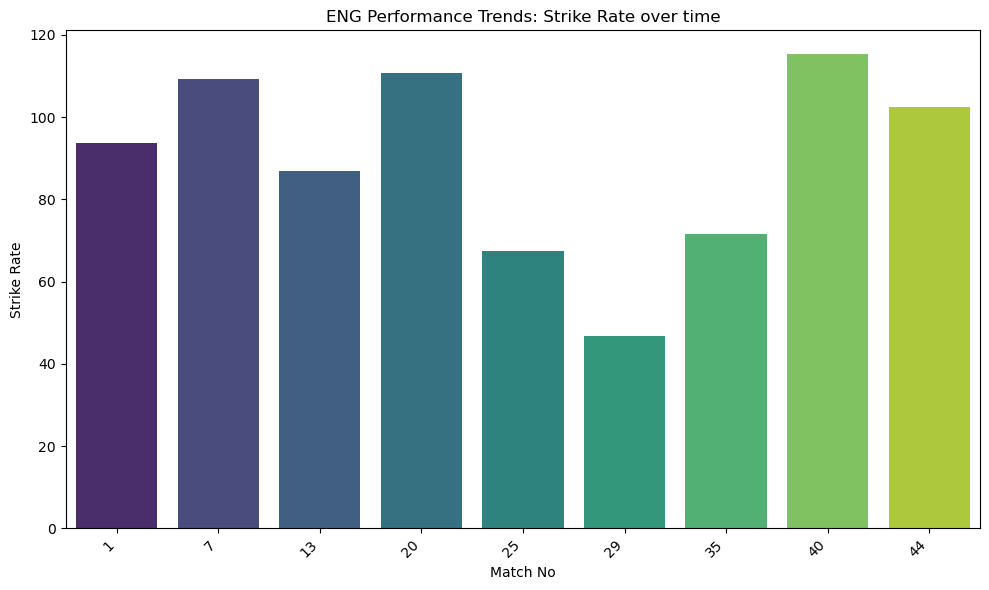

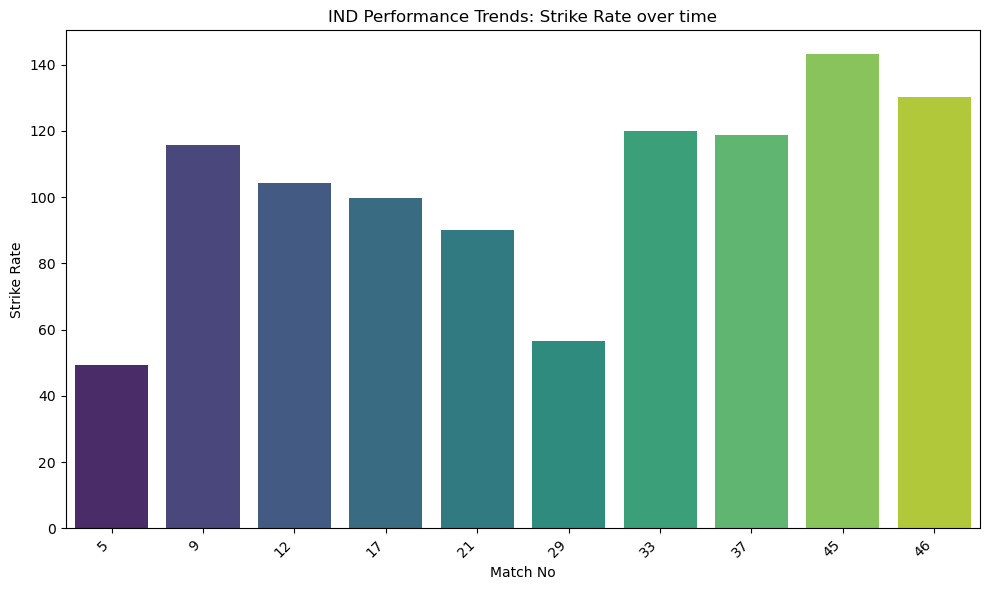

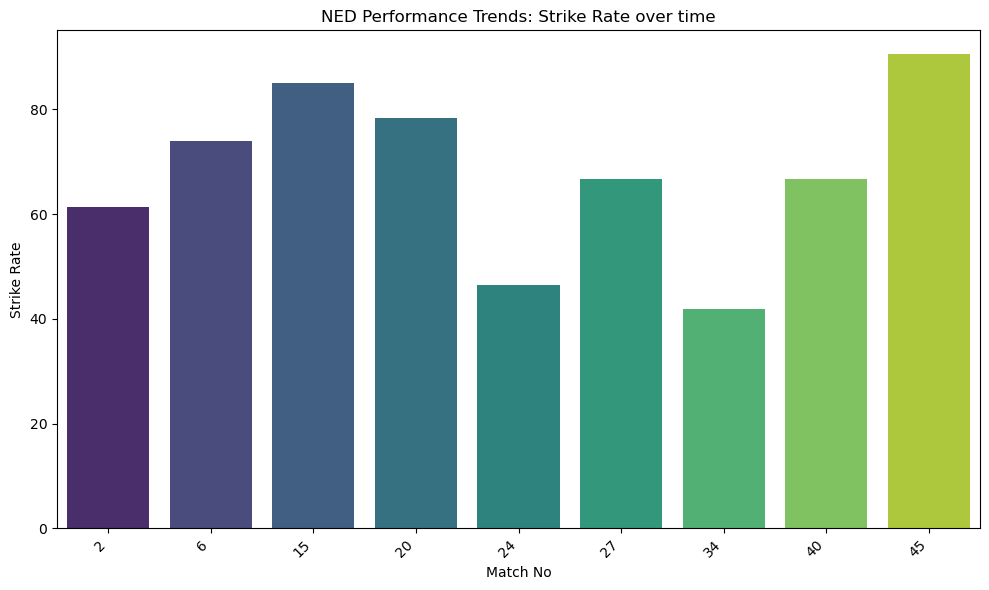

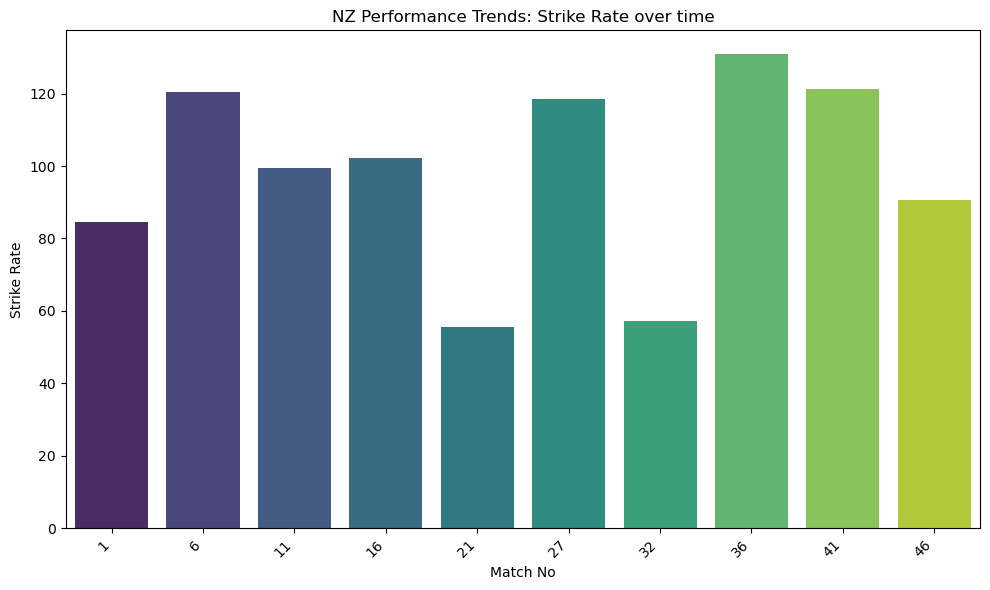

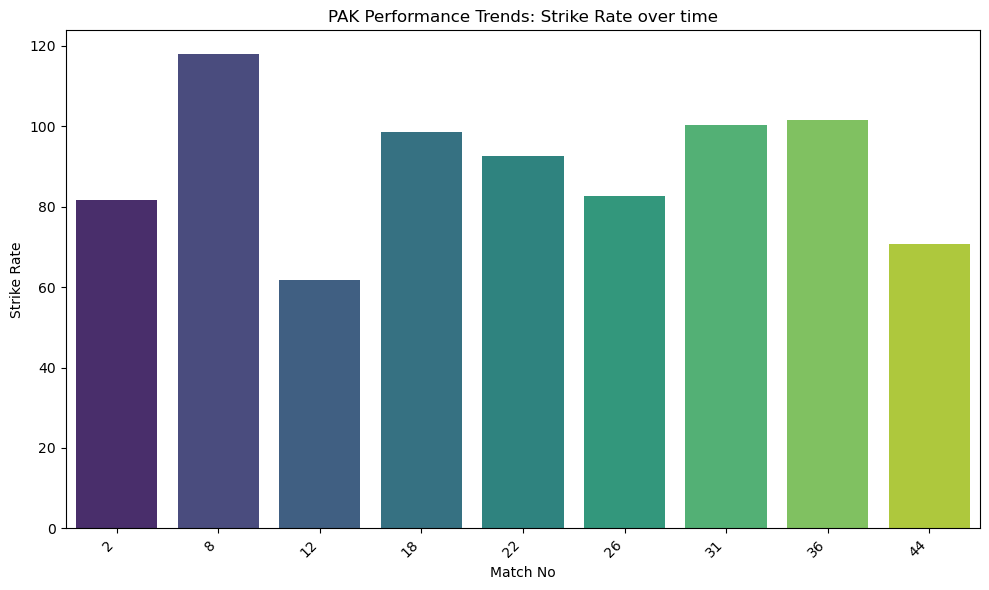

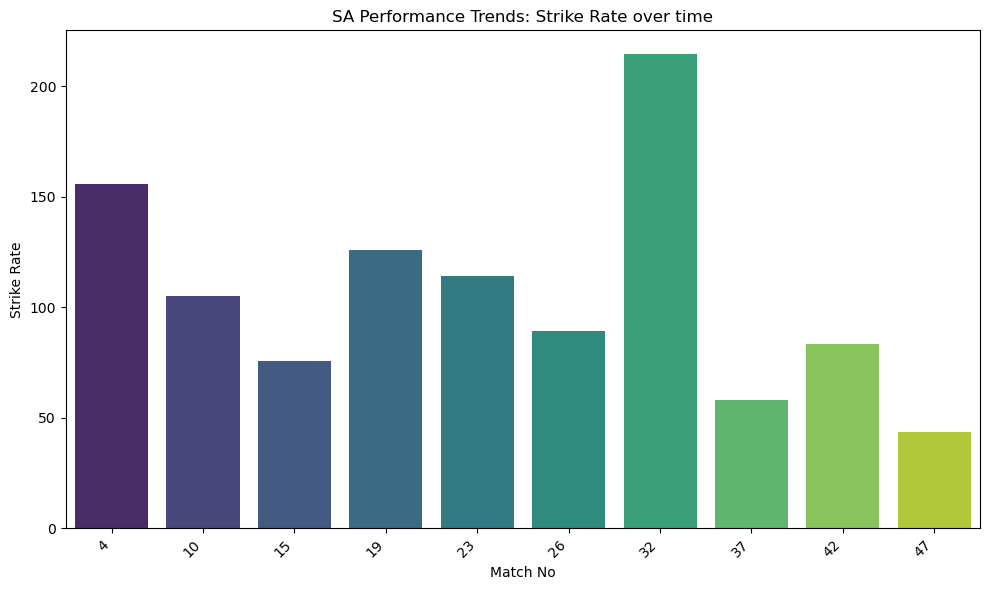

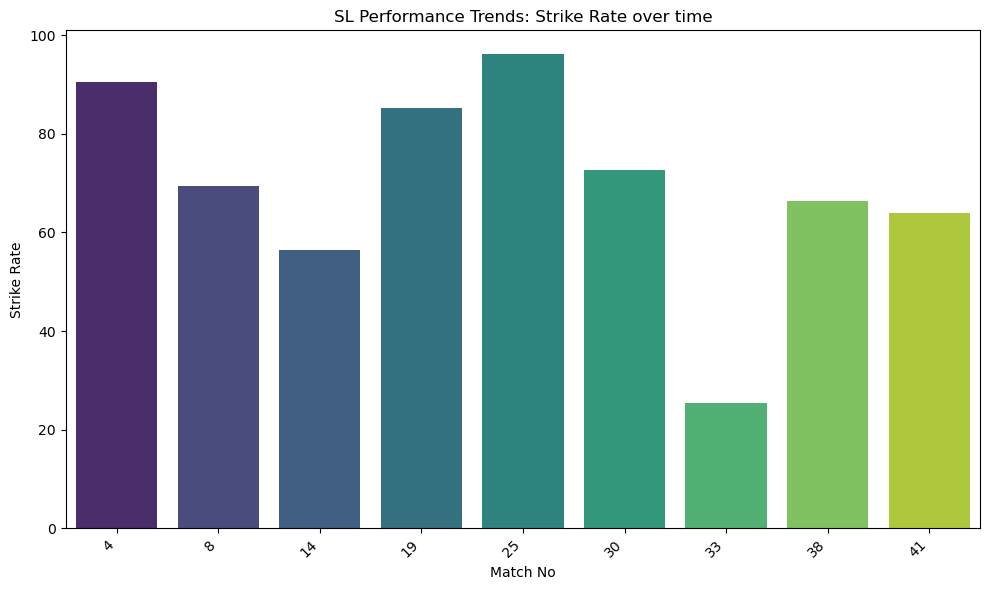

In [18]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bat'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='Strike Rate', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Strike Rate over time')
    plt.xlabel('Match No')
    plt.ylabel('Strike Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


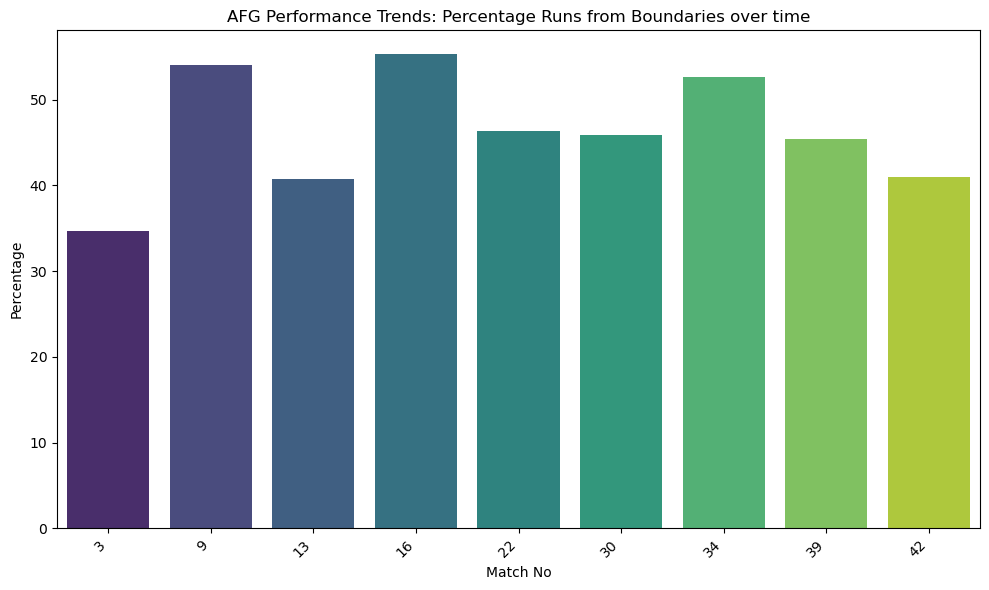

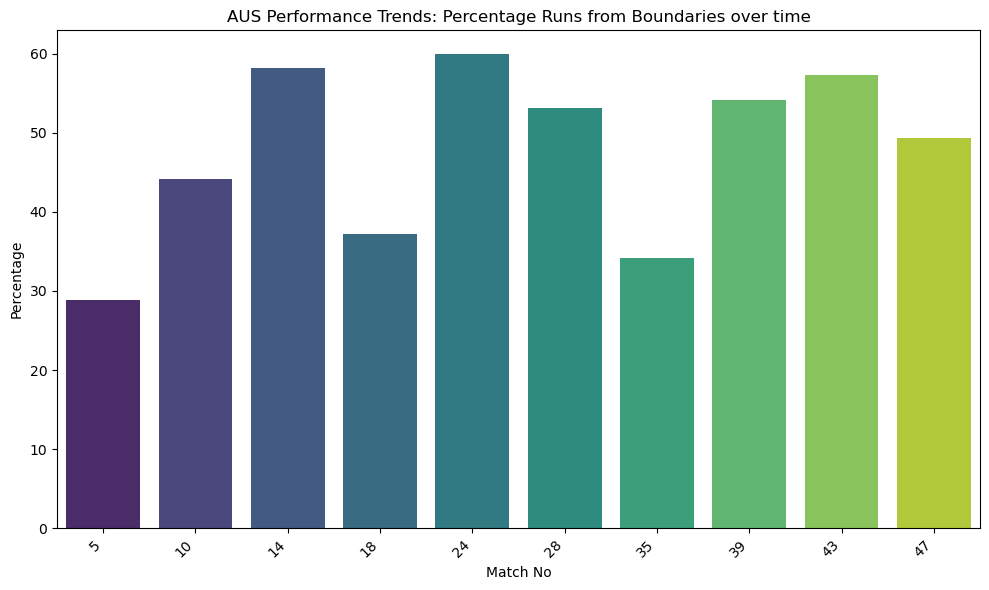

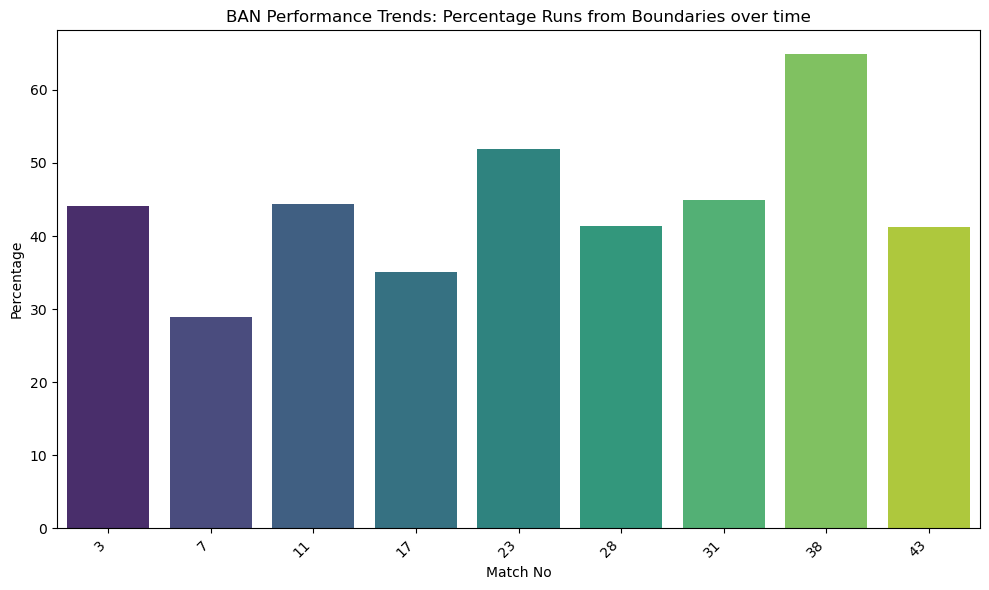

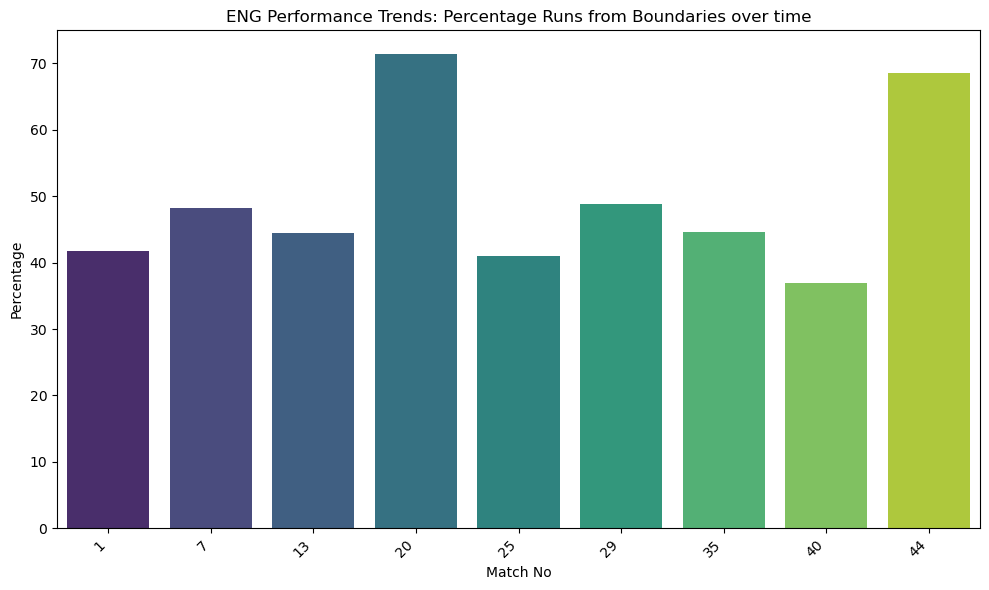

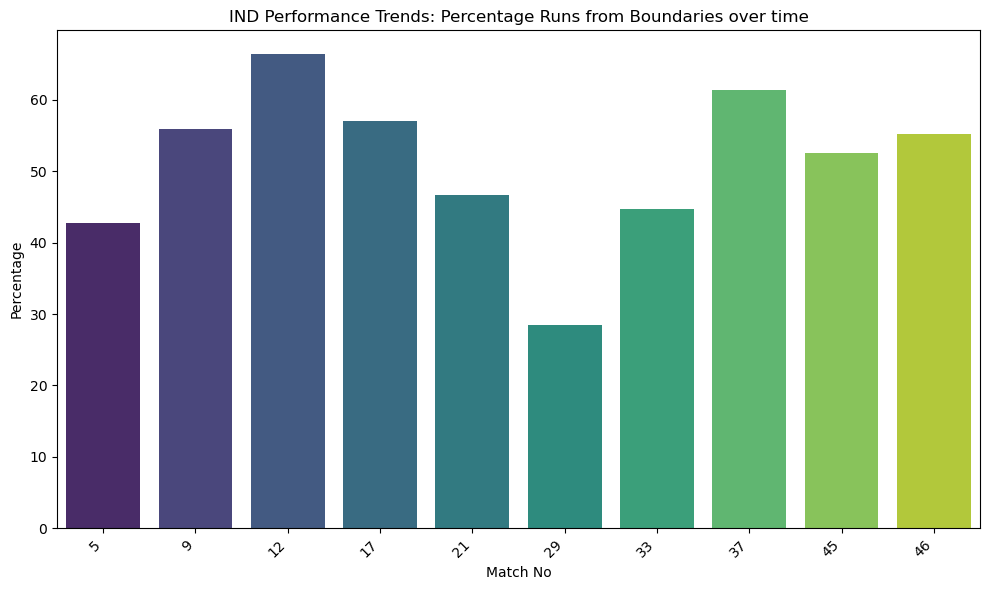

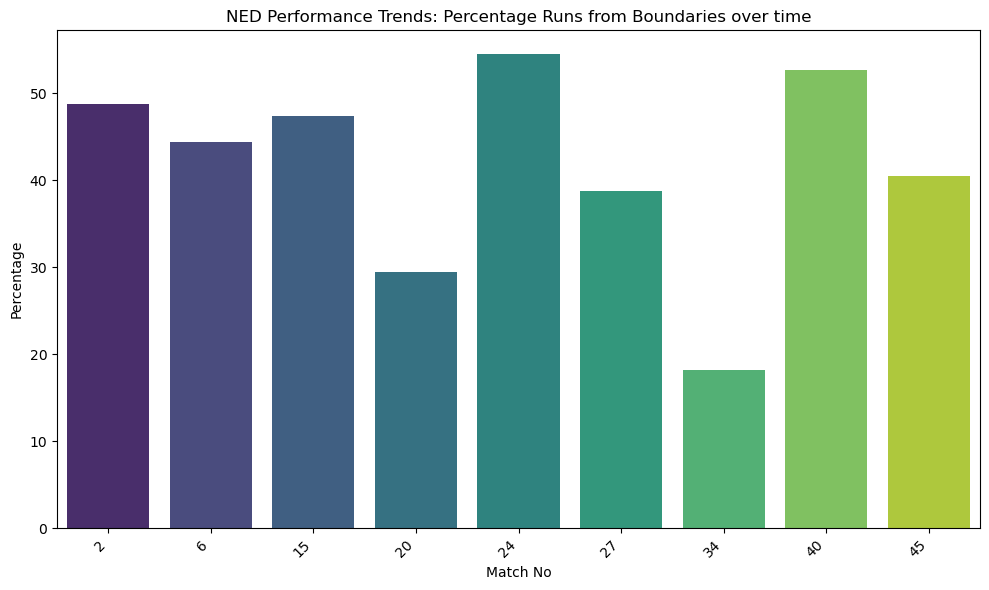

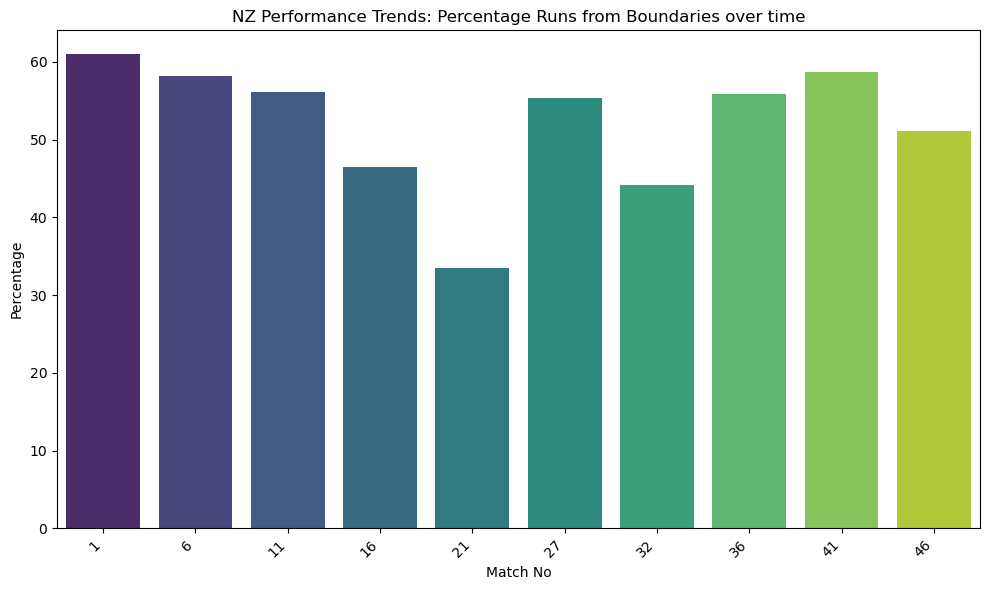

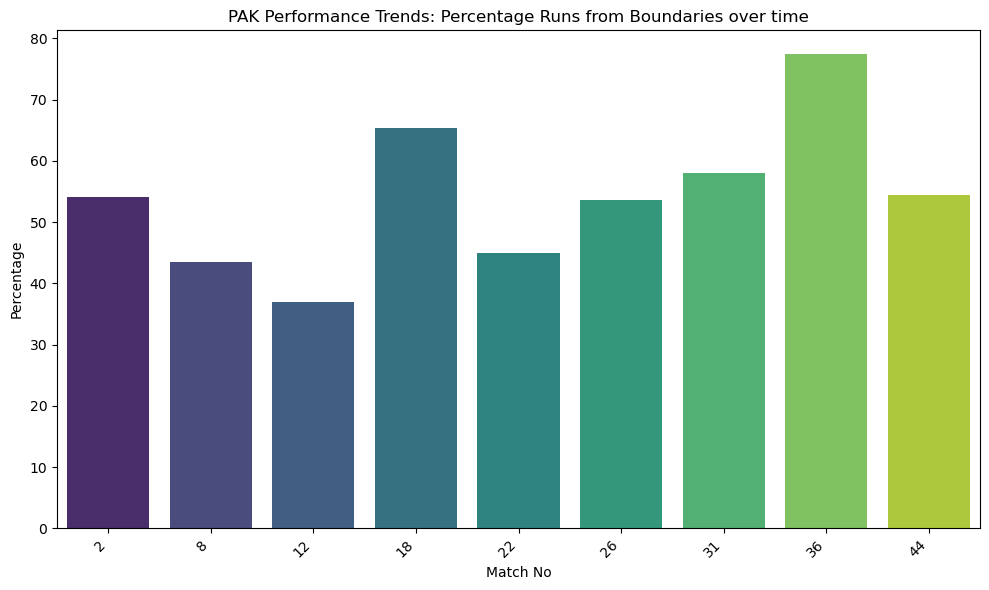

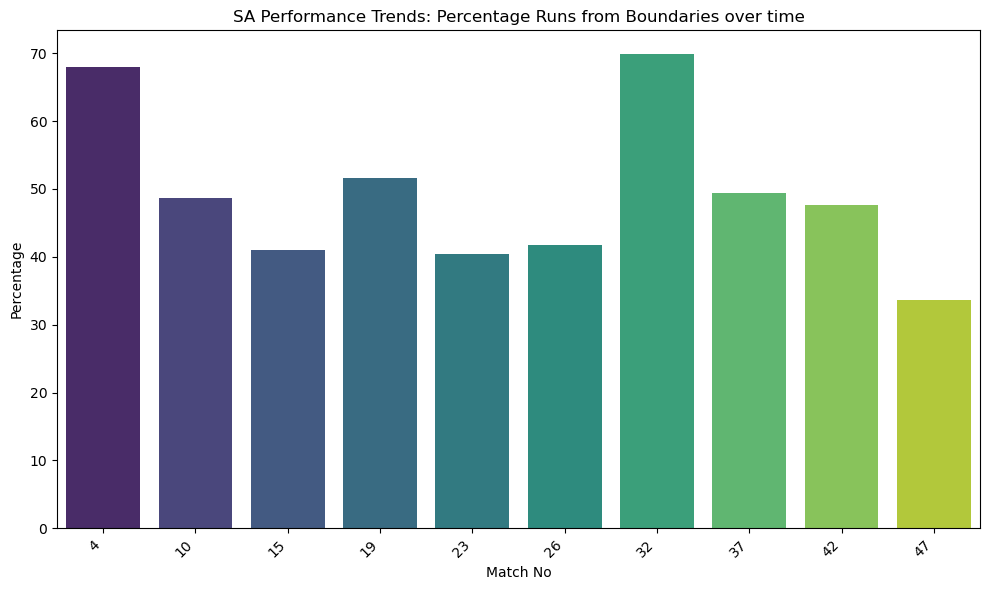

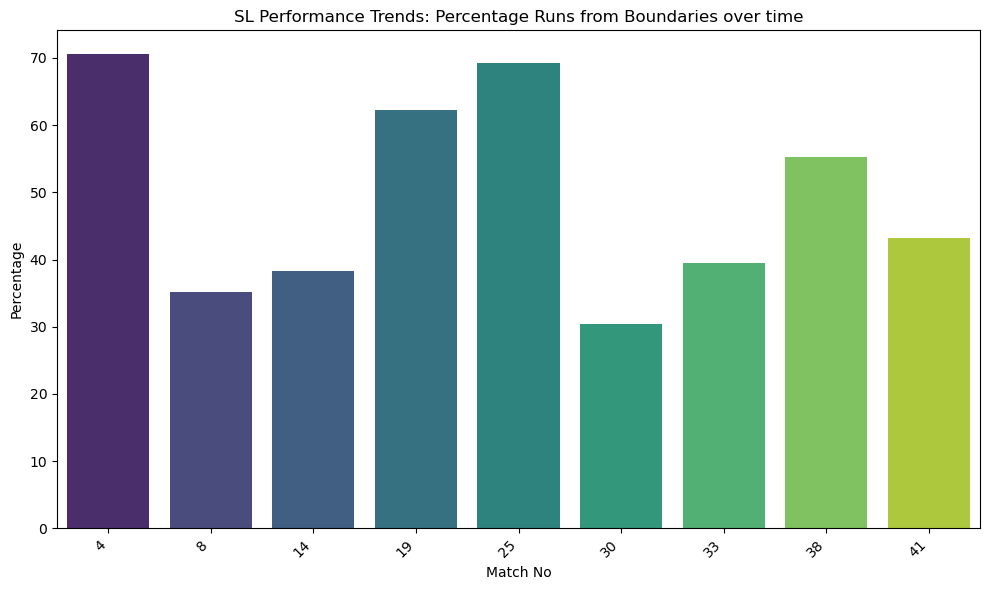

In [19]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bat'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'Percentage Runs from Boundaries': 'mean'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='Percentage Runs from Boundaries', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Percentage Runs from Boundaries over time')
    plt.xlabel('Match No')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


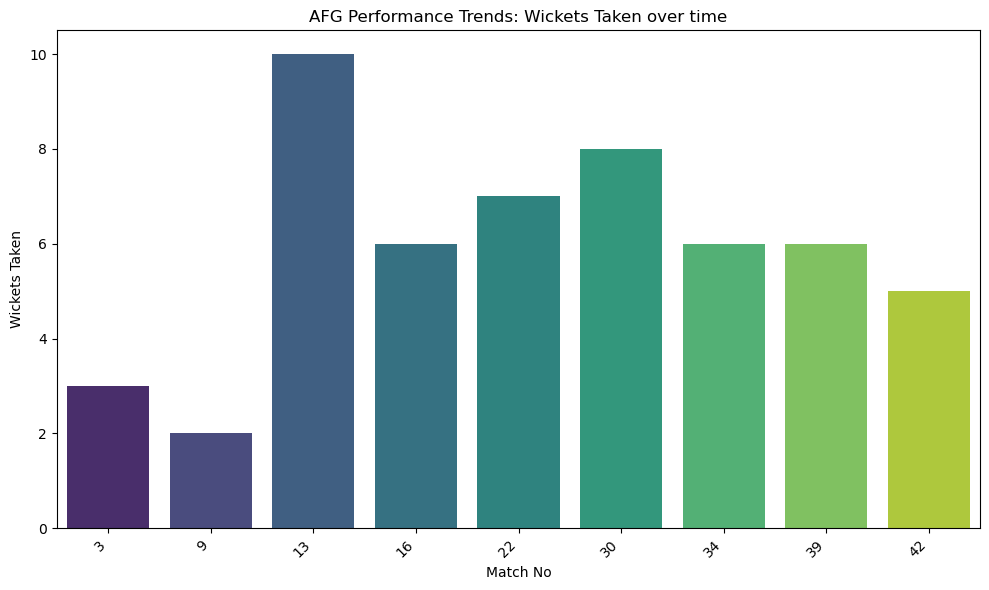

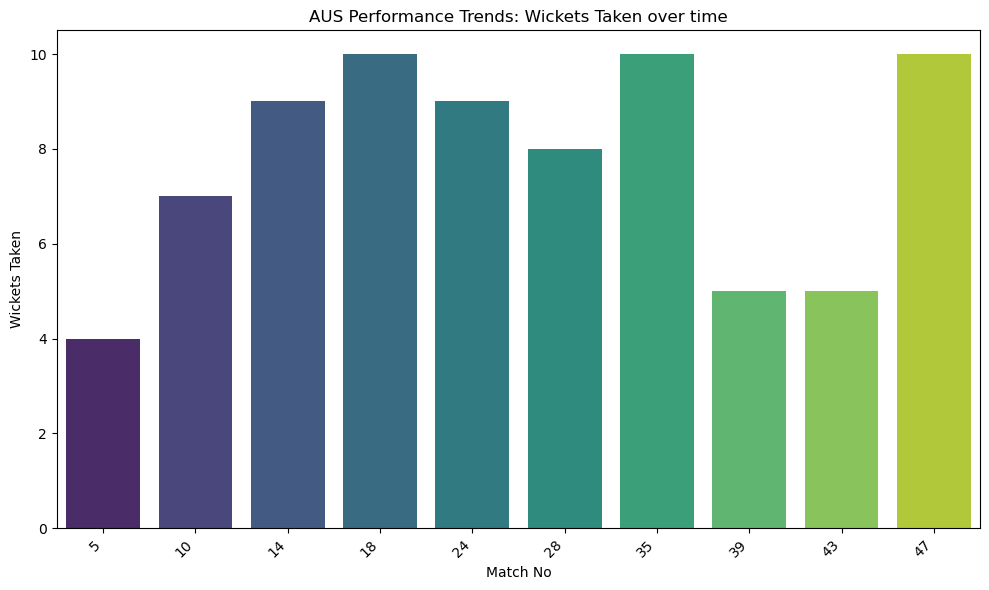

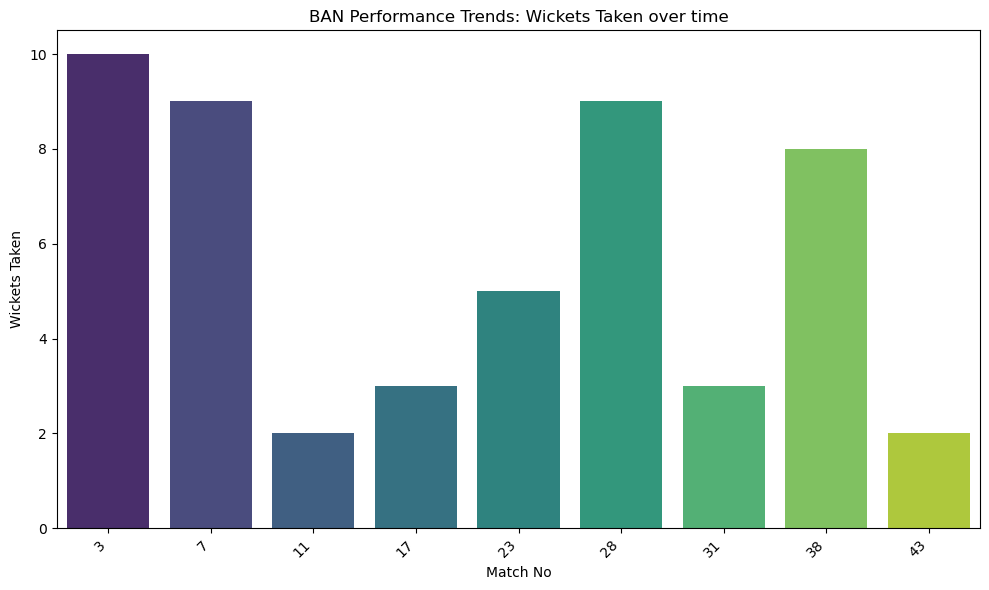

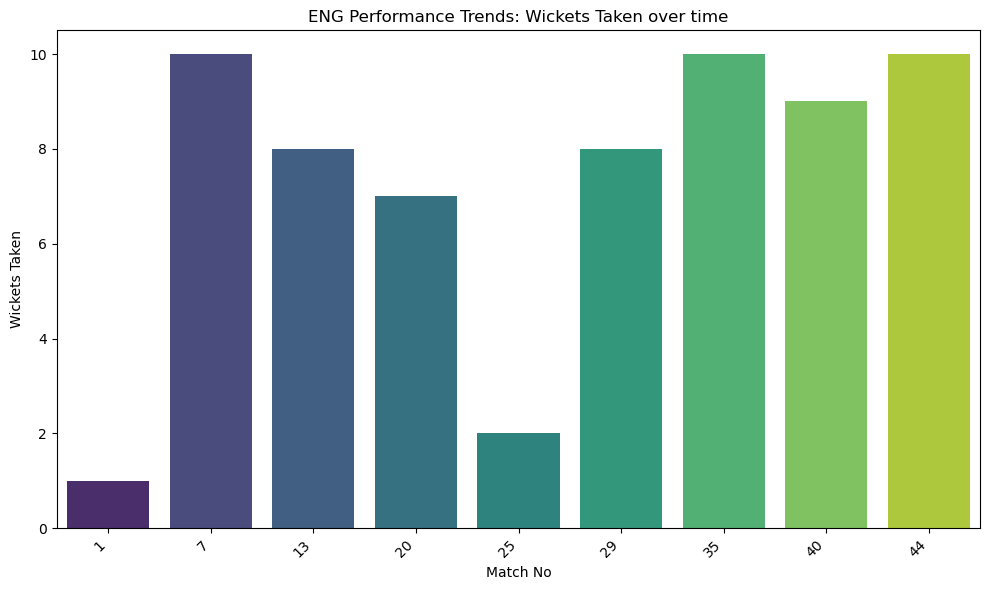

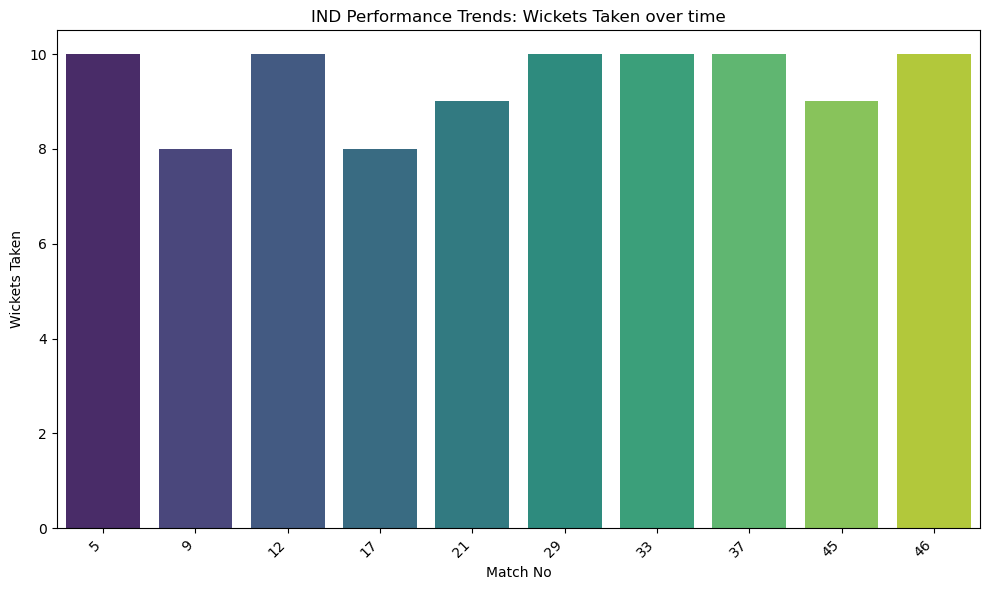

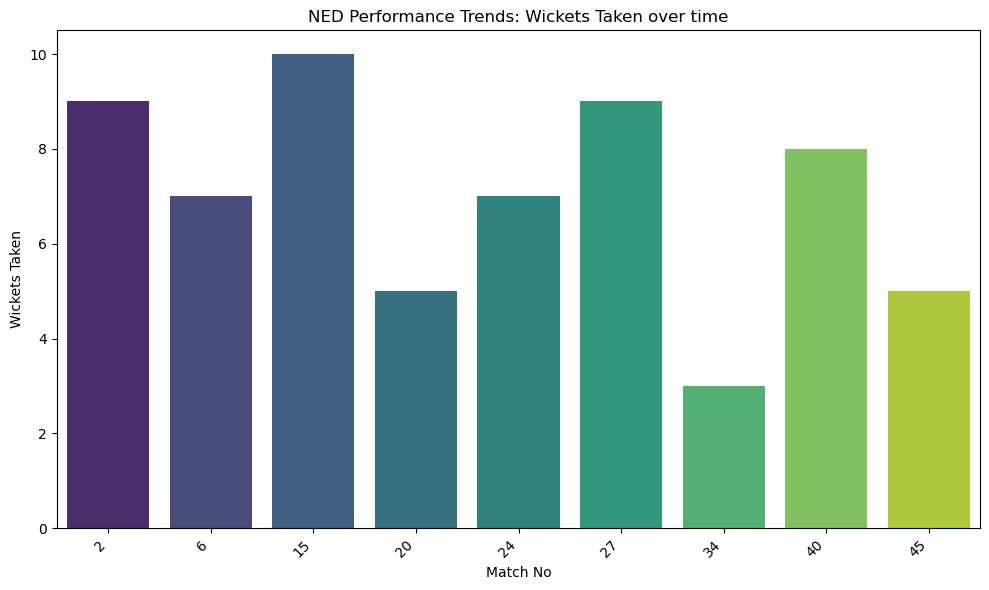

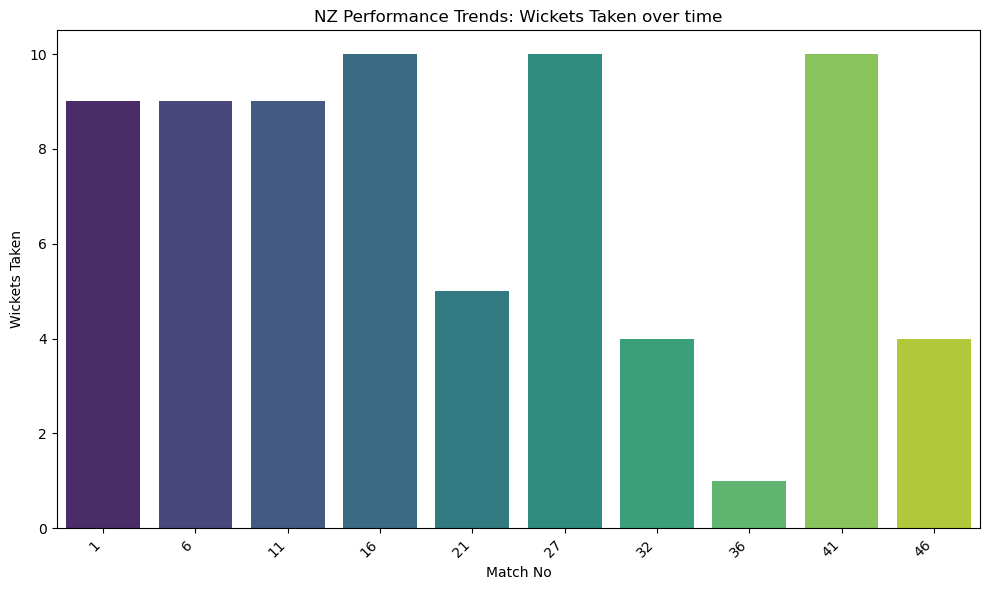

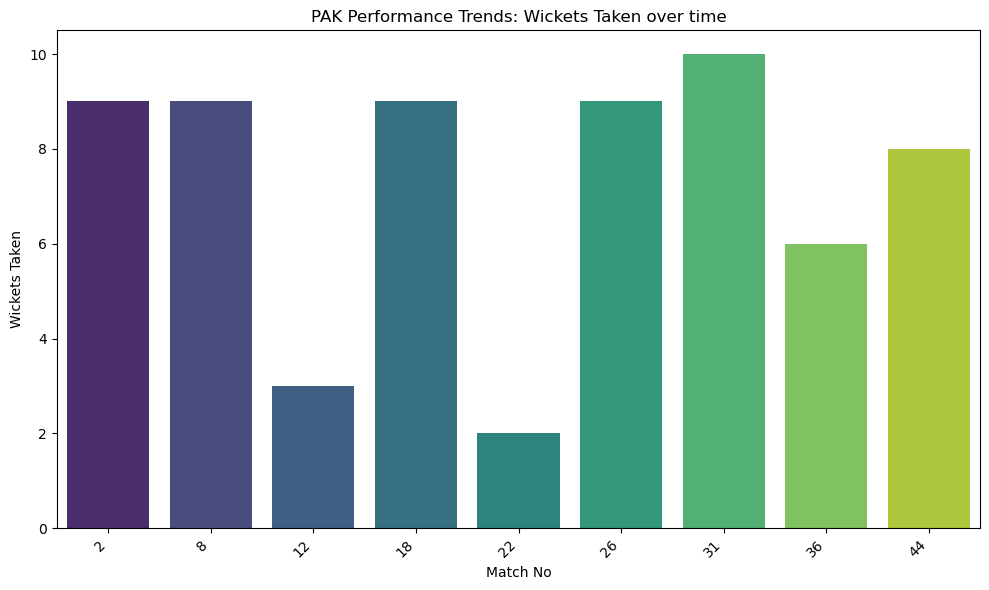

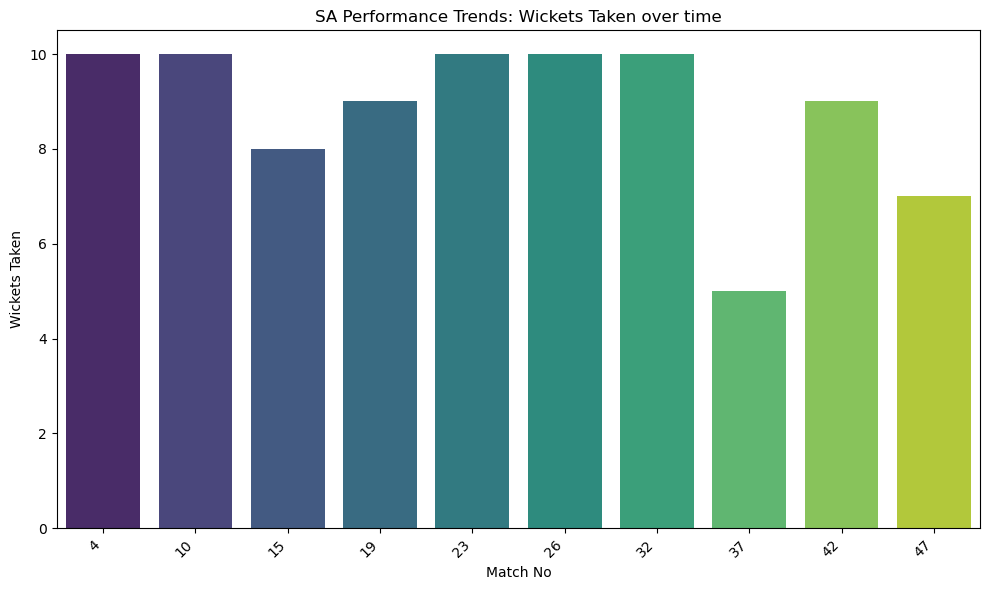

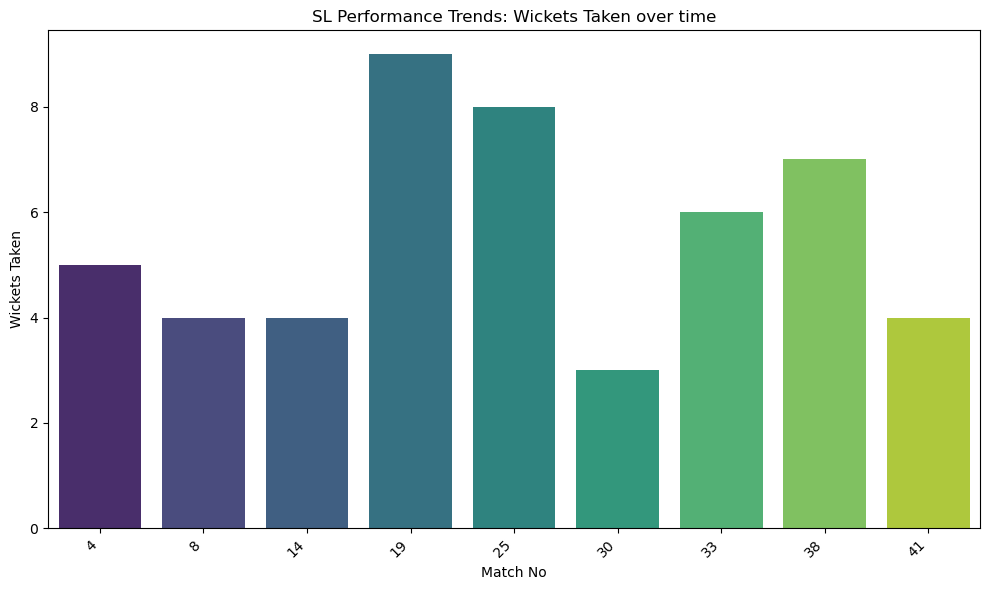

In [20]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bowl'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='wkts', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Wickets Taken over time')
    plt.xlabel('Match No')
    plt.ylabel('Wickets Taken')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


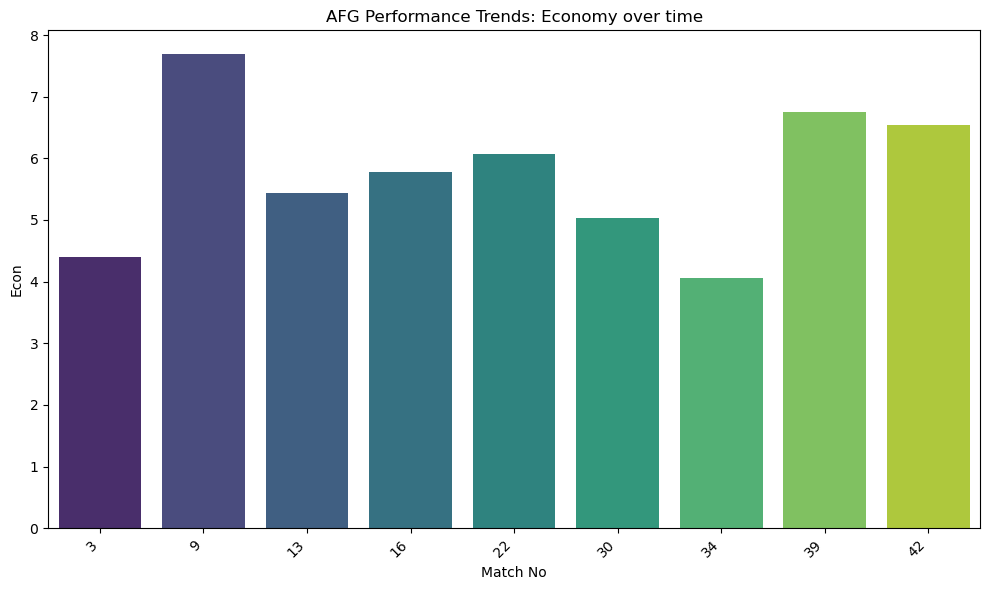

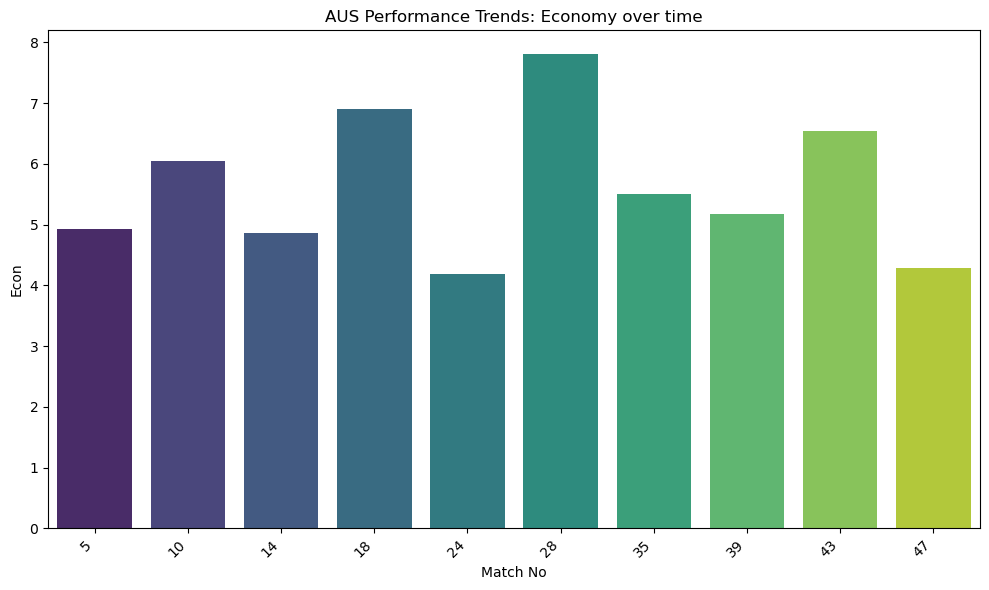

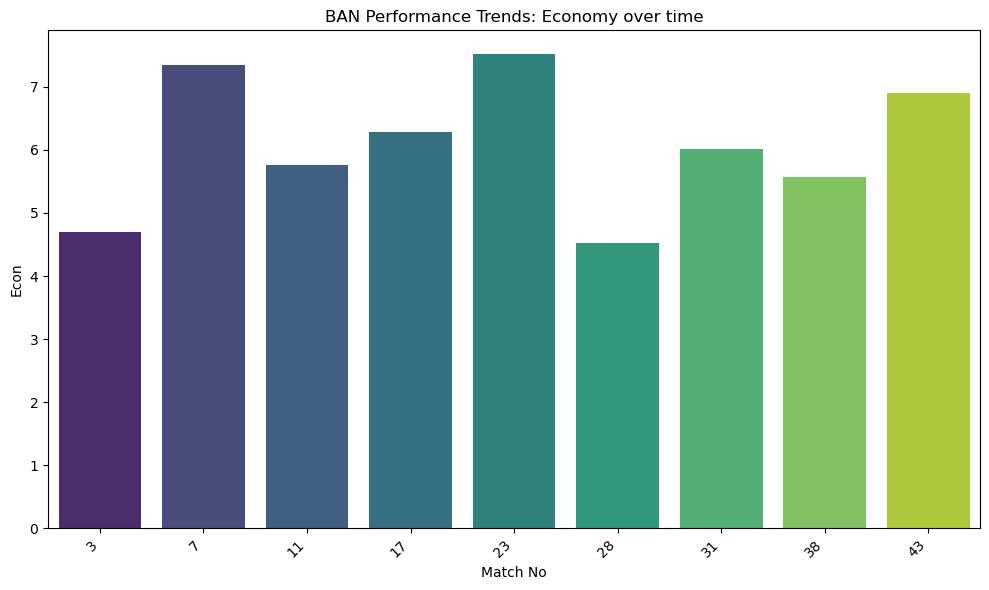

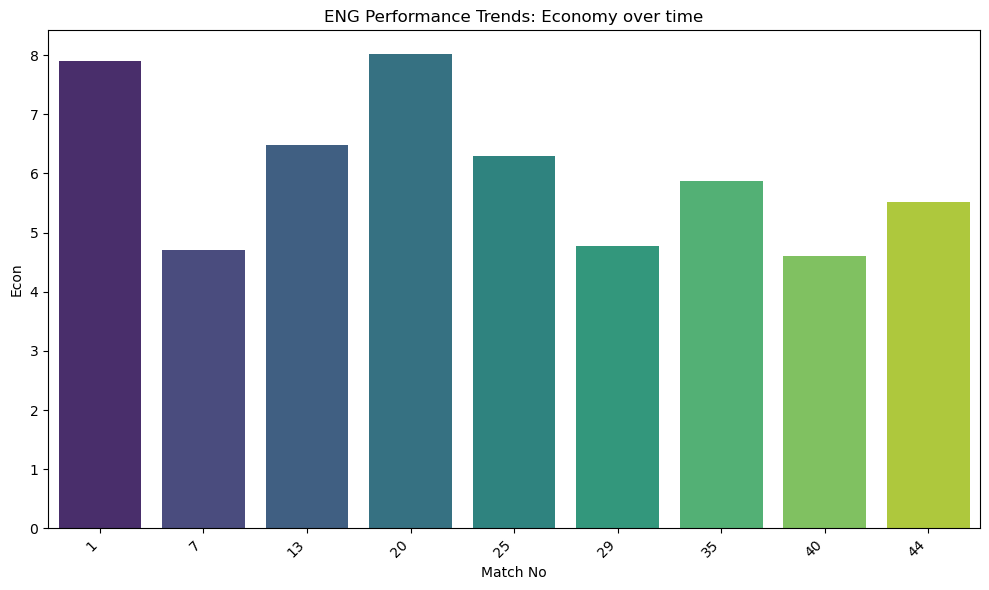

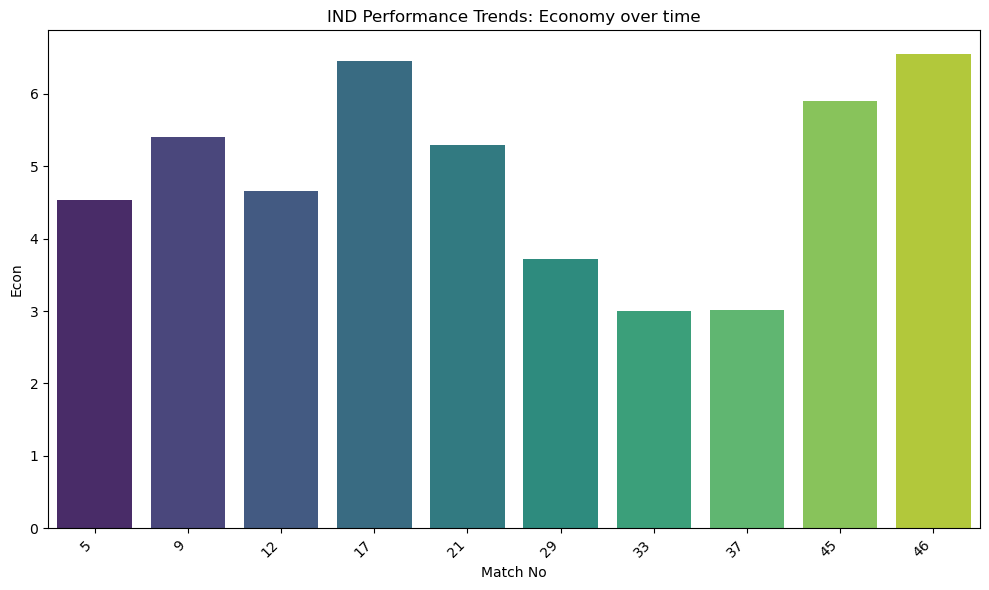

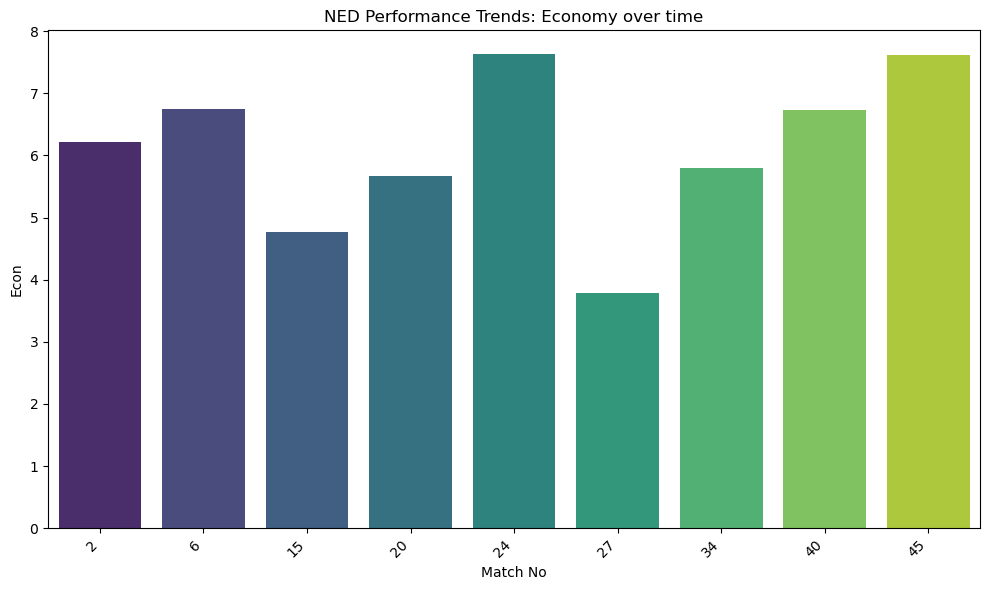

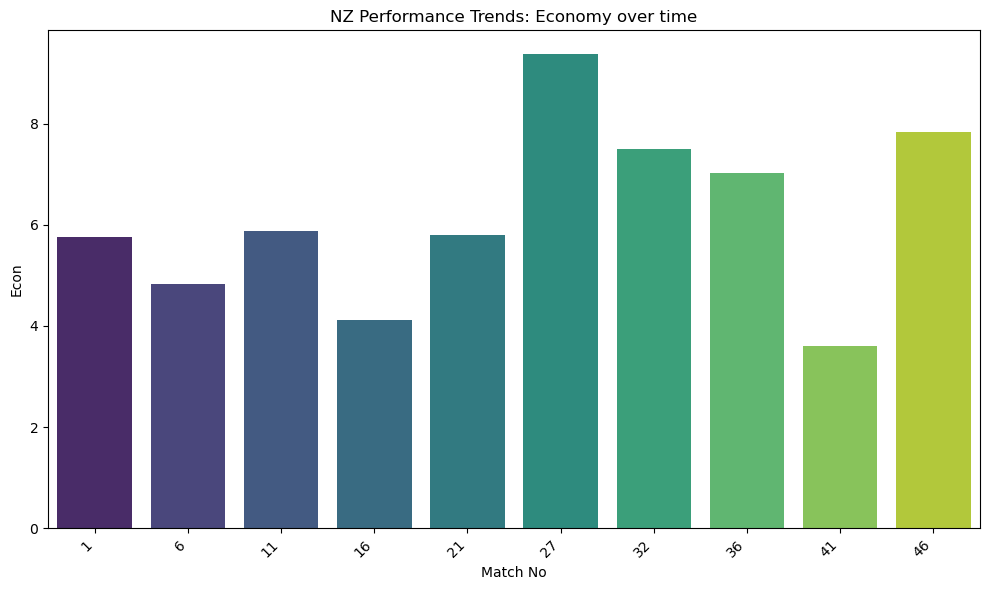

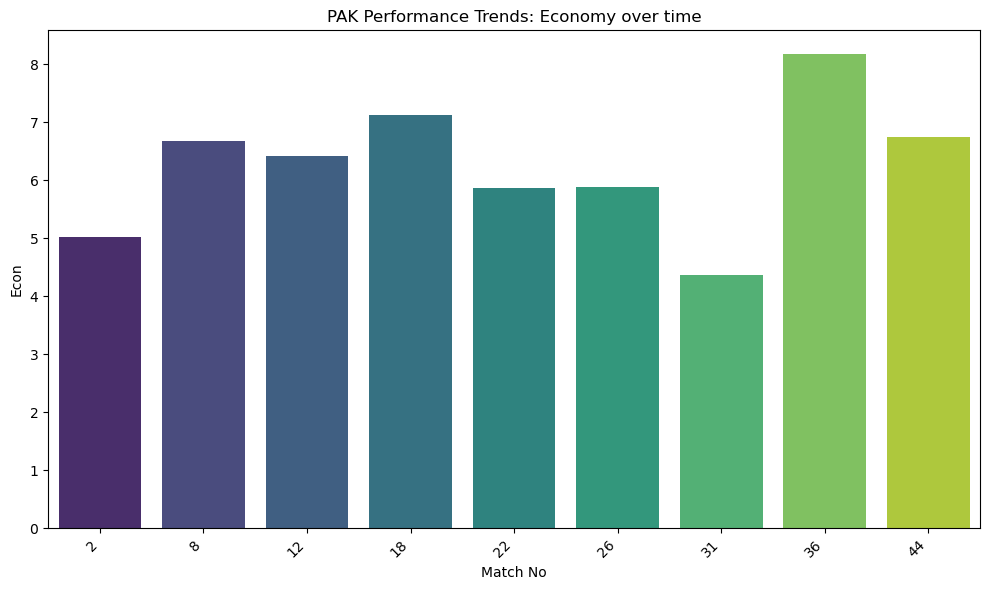

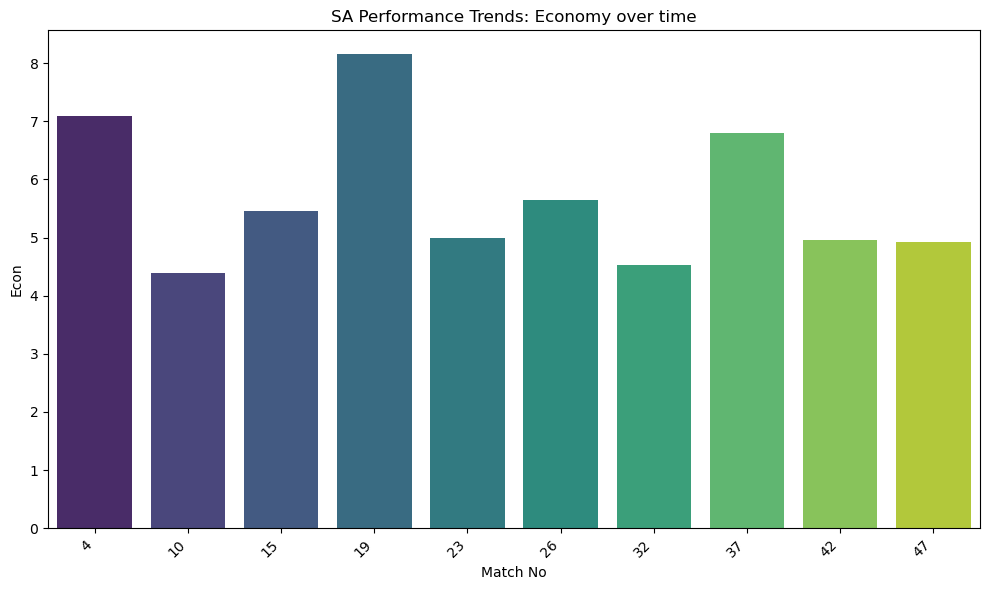

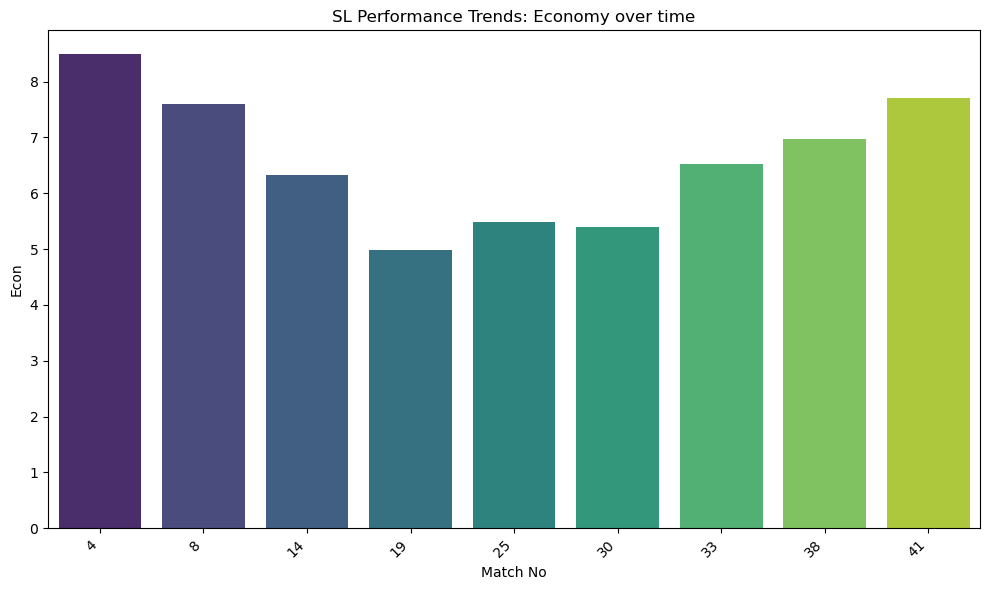

In [21]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bowl'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='econ', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Economy over time')
    plt.xlabel('Match No')
    plt.ylabel('Econ')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


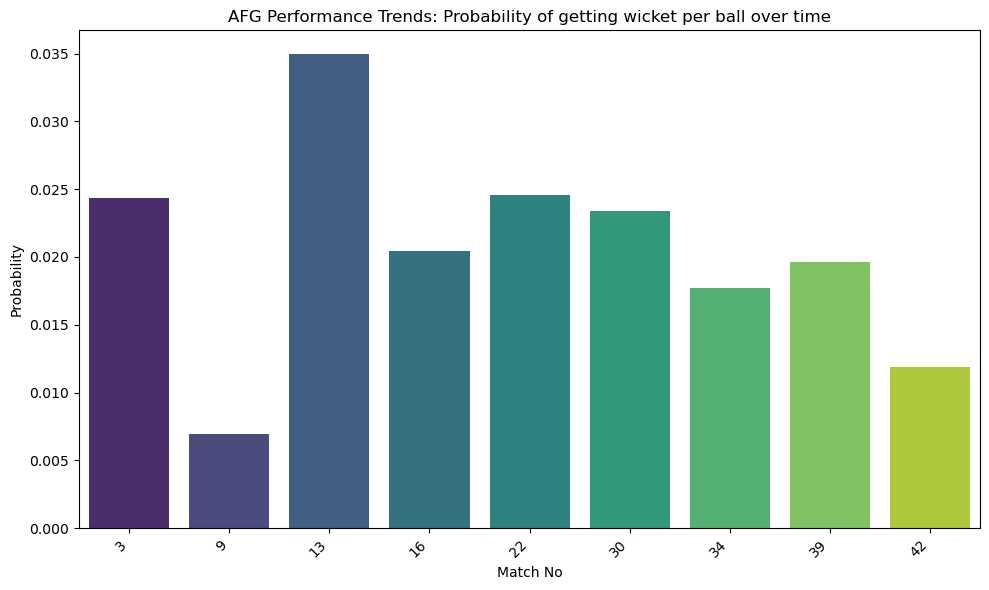

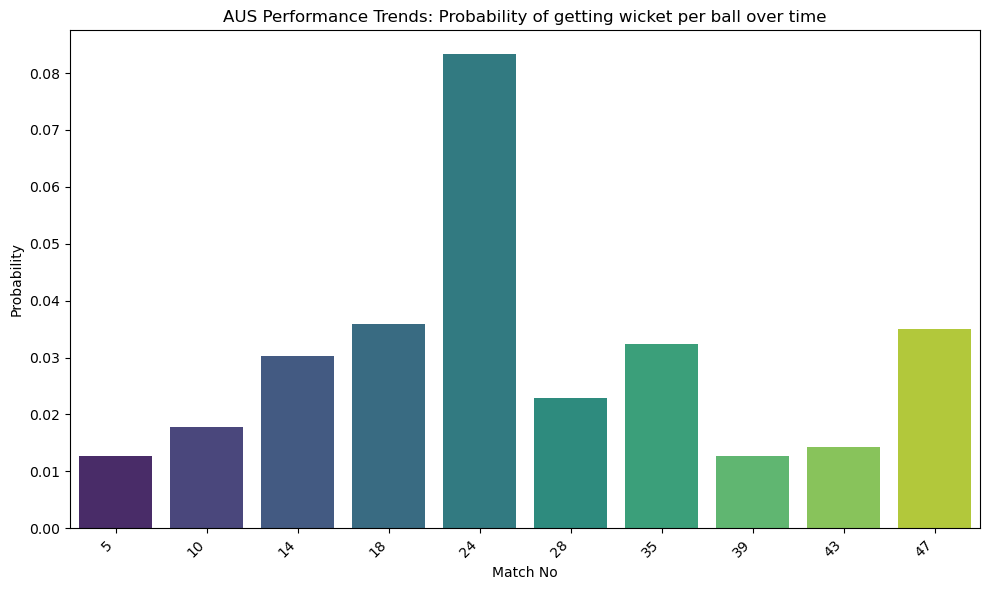

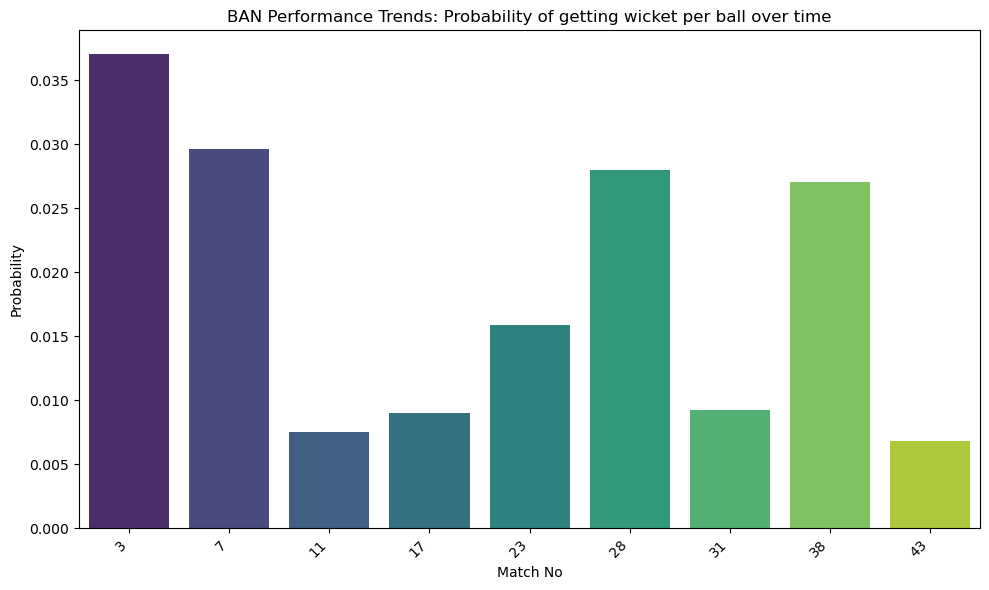

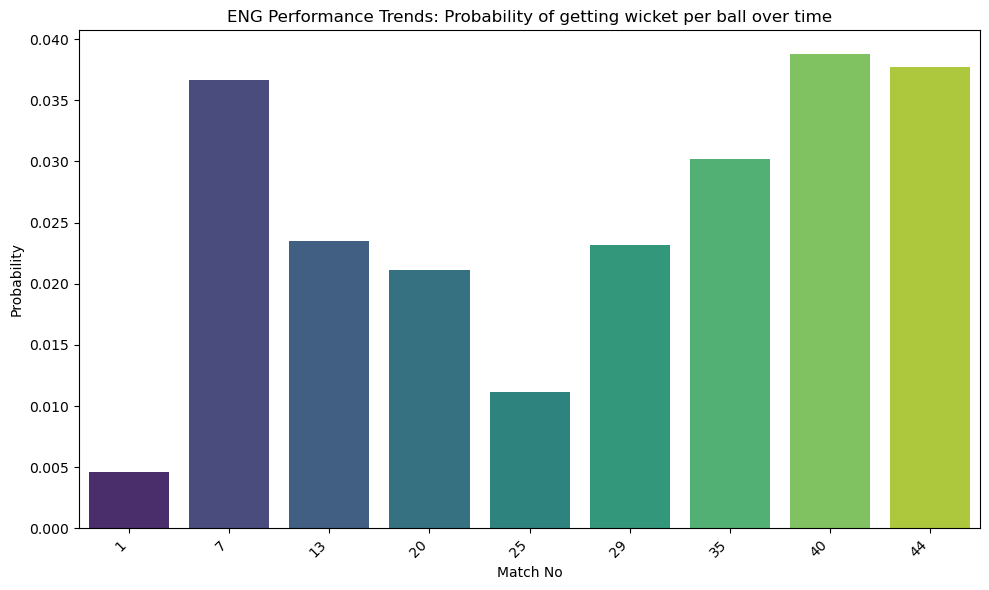

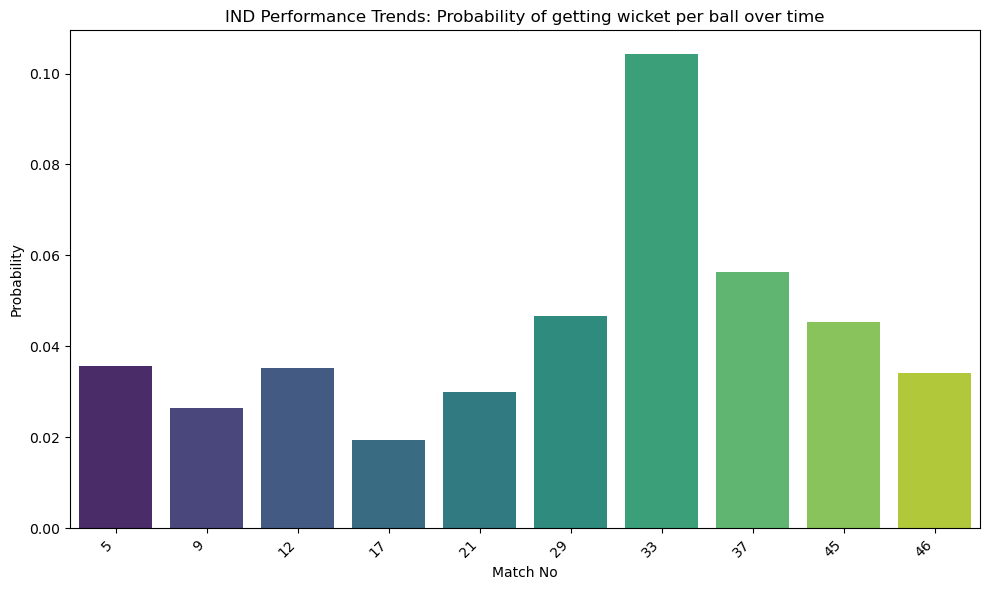

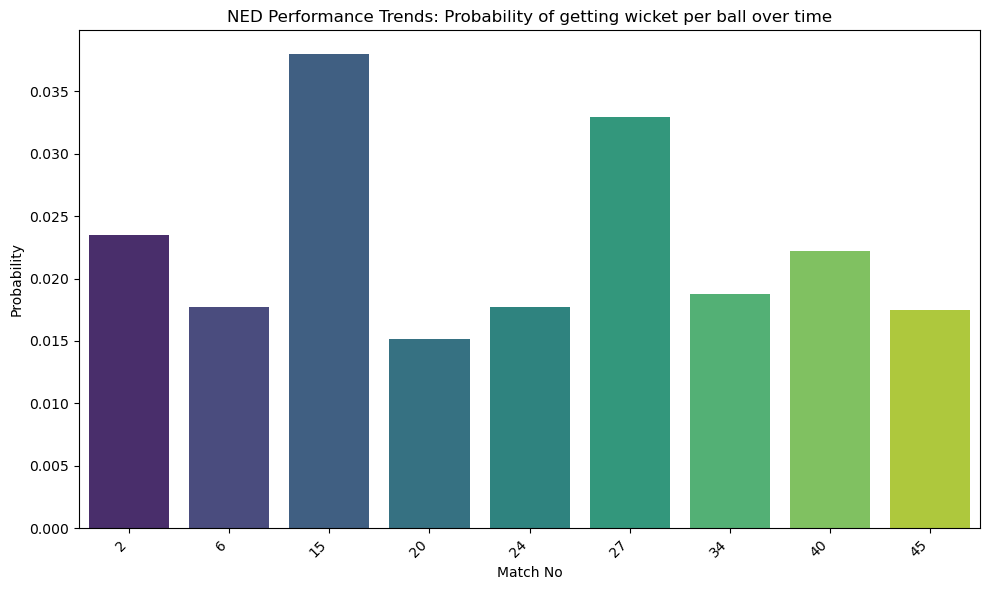

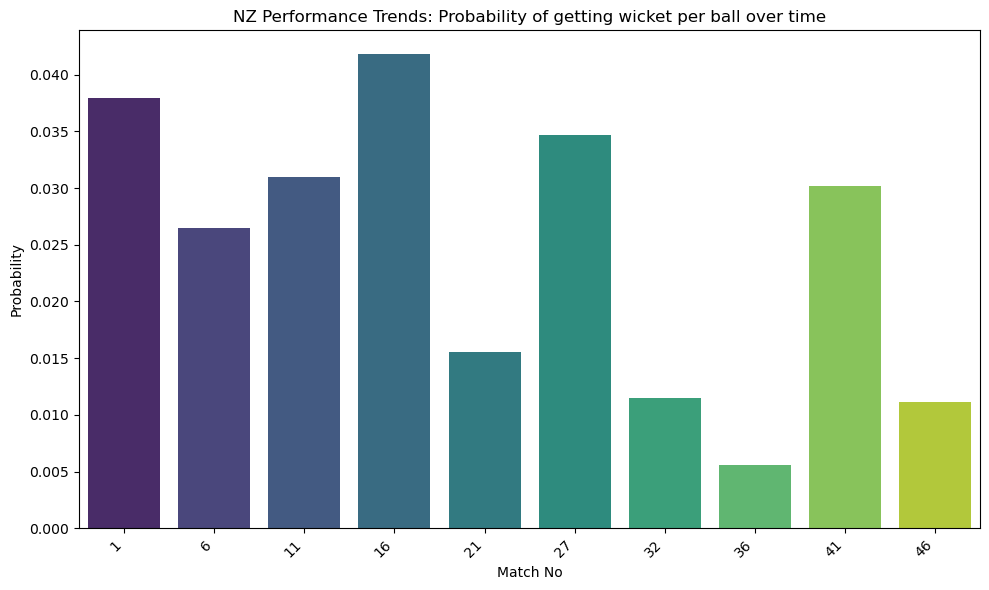

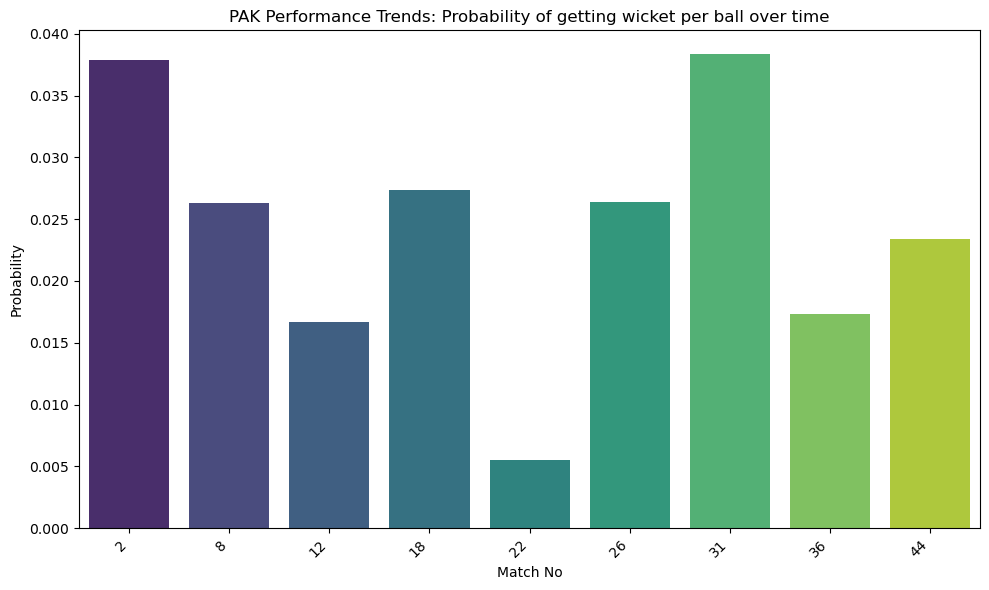

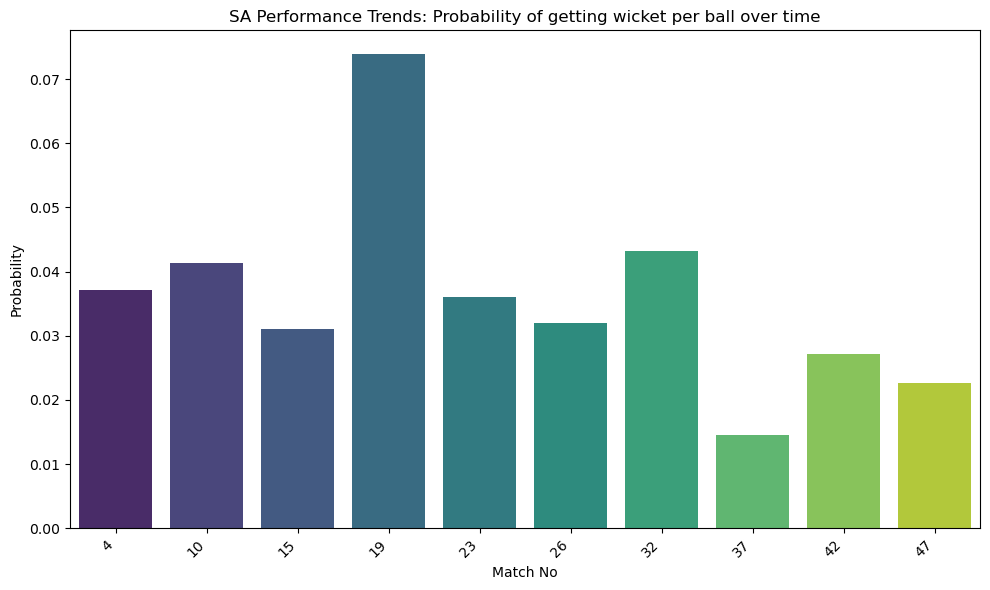

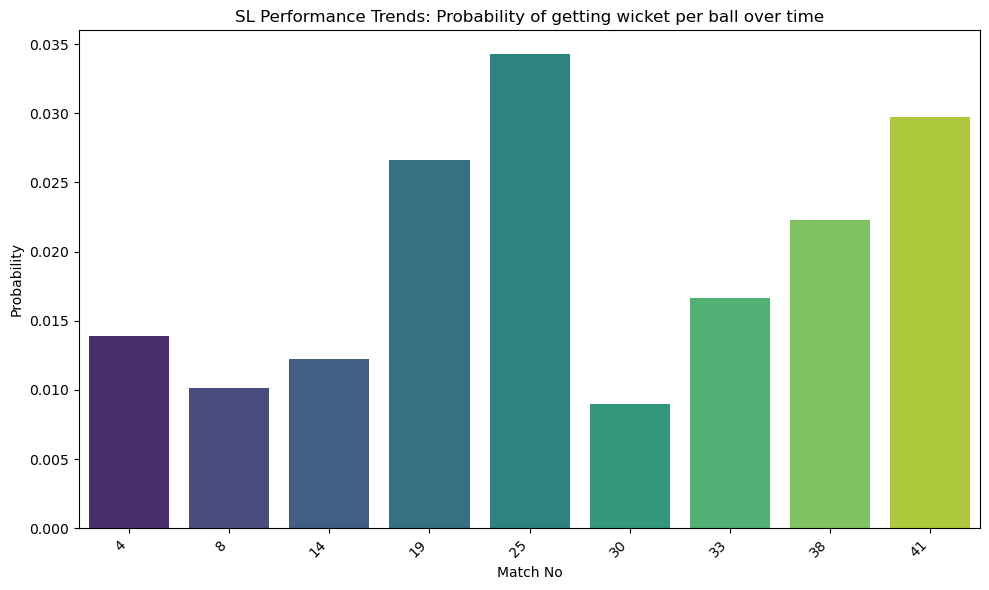

In [22]:
# Team-wise performance
team_temporal_performance = df[df['bat_or_bowl'] == 'bowl'].groupby(['team', 'match_no']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'Strike Rate': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(10, 6))
    sns.barplot(x='match_no', y='wicketball_prob', data=team_temporal_performance_single, palette='viridis')
    plt.title(f'{team_name} Performance Trends: Probability of getting wicket per ball over time')
    plt.xlabel('Match No')
    plt.ylabel('Probability')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
